# this project is about identifing bugs in insider treding

# import the require the library

In [3]:
# impeot numrical python for perfroming oprection on differnt data structre
import numpy as np

# import pandas for converting different file formate into pandas dataframe
import pandas as pd

#import seaborn and matplotlib for creating the interactive visulization
import seaborn as sns
import matplotlib.pyplot as plt

# load the data

In [5]:
# load the data for local
df_nvdia_insider_sales_simulated = pd.read_csv('nvidia_insider_sales_simulated.csv')

In [6]:
# check  the first five observation of the data
df_nvdia_insider_sales_simulated.head()

,Insider_Sale_Amount,Insider_Sale_Volume,Insider_Role,Trading_Plan_Type,Sale_Date,Stock_Price,Stock_Price_Change_1D,Stock_Price_Volatility,Market_Cap,AI_Sector_Index,Competitor_Activity,Sentiment_Score_News,Sentiment_Score_Social,Market_Sentiment,Insider_Sale_Frequency,Days_Since_Last_Sale,Revenue_Growth,PE_Ratio,Insider_Sale_Likelihood,Stock_Price_Impact
0,2.216410e+08,288983,Board Member,Non-10b5-1,2023-04-15,132.45,2.49,0.0452,3.569191e+12,109.46,Low,0.677,0.727,-0.62,13,76,34.33,61.80,0.093,0.59
1,1.397794e+07,1727529,CEO,Non-10b5-1,2024-03-16,118.56,2.95,0.0217,3.591775e+12,123.52,High,0.116,-0.954,-1.10,3,12,18.09,76.25,0.298,1.83
2,1.448496e+08,548658,VP,Non-10b5-1,2023-02-13,141.47,0.52,0.0381,3.544091e+12,117.83,Medium,-0.623,0.557,-1.11,2,57,43.77,52.35,0.899,2.99
3,9.988644e+07,590163,CEO,10b5-1,2024-12-27,148.15,0.70,0.0414,3.628254e+12,115.52,Medium,-0.866,-0.483,-1.24,4,24,45.73,69.06,0.449,2.45
4,1.738876e+08,1376908,CFO,10b5-1,2025-01-30,136.54,4.11,0.0491,3.682084e+12,124.33,Medium,0.055,0.355,0.90,11,16,37.68,60.58,0.490,-2.13


In [7]:
 # check  the last five observation of the data
df_nvdia_insider_sales_simulated.tail()

,Insider_Sale_Amount,Insider_Sale_Volume,Insider_Role,Trading_Plan_Type,Sale_Date,Stock_Price,Stock_Price_Change_1D,Stock_Price_Volatility,Market_Cap,AI_Sector_Index,Competitor_Activity,Sentiment_Score_News,Sentiment_Score_Social,Market_Sentiment,Insider_Sale_Frequency,Days_Since_Last_Sale,Revenue_Growth,PE_Ratio,Insider_Sale_Likelihood,Stock_Price_Impact
9995,2.522495e+08,81430,Director,10b5-1,2024-12-08,110.78,-3.38,0.0211,3.618575e+12,98.54,Medium,0.486,0.822,-1.51,6,66,48.27,79.82,0.792,3.87
9996,2.781672e+08,1671993,Board Member,Non-10b5-1,2023-05-17,128.97,2.61,0.0359,3.750375e+12,117.34,Low,0.432,-0.069,0.66,3,69,17.24,54.92,0.273,-0.70
9997,1.218529e+08,1915743,CEO,Non-10b5-1,2024-03-03,122.59,0.89,0.0341,3.791744e+12,125.25,Medium,-0.498,0.126,1.69,5,62,35.03,64.92,0.434,3.87
9998,2.306028e+07,1062612,EVP,Non-10b5-1,2025-04-10,128.71,3.13,0.0438,3.756529e+12,123.02,Low,-0.334,0.660,1.52,5,72,21.85,59.81,0.241,-3.19
9999,2.092745e+08,1299450,CFO,Non-10b5-1,2023-10-11,127.31,-2.53,0.0348,3.736592e+12,126.88,High,0.617,0.301,1.57,10,7,14.06,72.57,0.157,-4.25


## step 1 data overview

In [9]:
# check the columns we have into the data
df_nvdia_insider_sales_simulated.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Insider_Role',
       'Trading_Plan_Type', 'Sale_Date', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Competitor_Activity', 'Sentiment_Score_News',
       'Sentiment_Score_Social', 'Market_Sentiment', 'Insider_Sale_Frequency',
       'Days_Since_Last_Sale', 'Revenue_Growth', 'PE_Ratio',
       'Insider_Sale_Likelihood', 'Stock_Price_Impact'],
      dtype='object')

**interpritation**
 - 'Insider_Sale_Amount': price of insider sales,
 - 'Insider_Sale_Volume': number of shares sold in an insider transaction,
 - 'Insider_Role': job title or role of the insider,
 - 'Trading_Plan_Type: indicate wether the sales was a part of prearrenge trading plan'
 - 'Sale_Date: date when the sales occour'
 - 'Stock_Price: price of the company stock on the day insider sales'
 - 'Stock_Price_Change_1: price change when one day after saleD
 - 'Stock_Price_Volatilit: Measure of how much the stock price fluctuatesy
 - 'Market_Ca: market capitalization of the company at the time of the salep
 - 'AI_Sector_Ind: An index representing the performance of the AI sectore
 - 'Competitor_Activi: market action by competiatort
 - 'Sentiment_Score_Ne: score representing the overall sentiment of the news articlew
 - 'Sentiment_Score_Soc: Sentiment from social media sourcesi
 - 'Market_Sentim: invester sentiments in overall market at the timet'
 - 'Insider_Sale_Freque: the regularity of insider sales over the timen
 - 'Days_Since_Last_: the number of days since and insider last sold companies stocksS
 - 'Revenue_Gr: the percentage change in the companies revenue over spacific periodo
 - 'PE_R: price to earn ratioa
 - 'Insider_Sale_Likel: probability of insider salei
 - 'Stock_Price_I: actual impact of insider trading on stock price,mpact'

# check the shape of the data

In [12]:
df_nvdia_insider_sales_simulated.shape

(10000, 20)

**interpritation**
 - we have 10000 observesion and 20 atteribute

In [14]:
# check the basic info
df_nvdia_insider_sales_simulated.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Insider_Sale_Amount      10000 non-null  float64
 1   Insider_Sale_Volume      10000 non-null  int64  
 2   Insider_Role             10000 non-null  object 
 3   Trading_Plan_Type        10000 non-null  object 
 4   Sale_Date                10000 non-null  object 
 5   Stock_Price              10000 non-null  float64
 6   Stock_Price_Change_1D    10000 non-null  float64
 7   Stock_Price_Volatility   10000 non-null  float64
 8   Market_Cap               10000 non-null  float64
 9   AI_Sector_Index          10000 non-null  float64
 10  Competitor_Activity      10000 non-null  object 
 11  Sentiment_Score_News     10000 non-null  float64
 12  Sentiment_Score_Social   10000 non-null  float64
 13  Market_Sentiment         10000 non-null  float64
 14  Insider_Sale_Frequency 

**interpritation**
 - we have 16 numerical column and 4 ceterical column
 - this data acquied 1.5+mb space

In [16]:
# check for besic statistc
df_nvdia_insider_sales_simulated.describe().T

,count,mean,std,min,25%,50%,75%,max
Insider_Sale_Amount,10000.0,1.510375e+08,8.566095e+07,1.042335e+06,7.734842e+07,1.518846e+08,2.243284e+08,2.999715e+08
Insider_Sale_Volume,10000.0,9.948098e+05,5.731832e+05,1.016400e+04,4.959322e+05,9.921980e+05,1.490196e+06,1.999950e+06
Stock_Price,10000.0,1.250660e+02,1.444517e+01,1.000000e+02,1.126200e+02,1.251200e+02,1.375125e+02,1.499900e+02
Stock_Price_Change_1D,10000.0,-5.319200e-02,2.869508e+00,-5.000000e+00,-2.530000e+00,-8.000000e-02,2.400000e+00,5.000000e+00
Stock_Price_Volatility,10000.0,2.998188e-02,1.159546e-02,1.000000e-02,1.980000e-02,3.010000e-02,4.000000e-02,5.000000e-02
Market_Cap,10000.0,3.649326e+12,8.606010e+10,3.500027e+12,3.575322e+12,3.647836e+12,3.723153e+12,3.799997e+12
AI_Sector_Index,10000.0,1.098595e+02,1.151688e+01,9.000000e+01,9.994750e+01,1.099100e+02,1.197500e+02,1.300000e+02
Sentiment_Score_News,10000.0,4.400200e-03,5.757249e-01,-1.000000e+00,-4.900000e-01,1.500000e-03,5.040000e-01,9.990000e-01
Sentiment_Score_Social,10000.0,-1.536400e-03,5.769362e-01,-1.000000e+00,-4.982500e-01,-2.000000e-03,4.980000e-01,1.000000e+00
Market_Sentiment,10000.0,-8.666000e-03,1.154743e+00,-2.000000e+00,-1.020000e+00,0.000000e+00,9.800000e-01,2.000000e+00


**interpritation**
 - after observing this tabel i concude only one column that is Market Sentiment contain the outline remnining dont.	

## Data Preprocessing

### data cleaning

In [20]:
# checkn the name of the column 
df_nvdia_insider_sales_simulated.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Insider_Role',
       'Trading_Plan_Type', 'Sale_Date', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Competitor_Activity', 'Sentiment_Score_News',
       'Sentiment_Score_Social', 'Market_Sentiment', 'Insider_Sale_Frequency',
       'Days_Since_Last_Sale', 'Revenue_Growth', 'PE_Ratio',
       'Insider_Sale_Likelihood', 'Stock_Price_Impact'],
      dtype='object')

**interpritation**
 - After looking at the column i concude that ther is no need to rename the columns

In [22]:
# check the forment of columns
df_nvdia_insider_sales_simulated.head()

,Insider_Sale_Amount,Insider_Sale_Volume,Insider_Role,Trading_Plan_Type,Sale_Date,Stock_Price,Stock_Price_Change_1D,Stock_Price_Volatility,Market_Cap,AI_Sector_Index,Competitor_Activity,Sentiment_Score_News,Sentiment_Score_Social,Market_Sentiment,Insider_Sale_Frequency,Days_Since_Last_Sale,Revenue_Growth,PE_Ratio,Insider_Sale_Likelihood,Stock_Price_Impact
0,2.216410e+08,288983,Board Member,Non-10b5-1,2023-04-15,132.45,2.49,0.0452,3.569191e+12,109.46,Low,0.677,0.727,-0.62,13,76,34.33,61.80,0.093,0.59
1,1.397794e+07,1727529,CEO,Non-10b5-1,2024-03-16,118.56,2.95,0.0217,3.591775e+12,123.52,High,0.116,-0.954,-1.10,3,12,18.09,76.25,0.298,1.83
2,1.448496e+08,548658,VP,Non-10b5-1,2023-02-13,141.47,0.52,0.0381,3.544091e+12,117.83,Medium,-0.623,0.557,-1.11,2,57,43.77,52.35,0.899,2.99
3,9.988644e+07,590163,CEO,10b5-1,2024-12-27,148.15,0.70,0.0414,3.628254e+12,115.52,Medium,-0.866,-0.483,-1.24,4,24,45.73,69.06,0.449,2.45
4,1.738876e+08,1376908,CFO,10b5-1,2025-01-30,136.54,4.11,0.0491,3.682084e+12,124.33,Medium,0.055,0.355,0.90,11,16,37.68,60.58,0.490,-2.13


**interpritation**
 - there is few impurities are present that we solved in basic excel 

### Null value hendling

In [25]:
# check the cont of null recorde 
df_nvdia_insider_sales_simulated.isnull().sum()

Insider_Sale_Amount        0
Insider_Sale_Volume        0
Insider_Role               0
Trading_Plan_Type          0
Sale_Date                  0
Stock_Price                0
Stock_Price_Change_1D      0
Stock_Price_Volatility     0
Market_Cap                 0
AI_Sector_Index            0
Competitor_Activity        0
Sentiment_Score_News       0
Sentiment_Score_Social     0
Market_Sentiment           0
Insider_Sale_Frequency     0
Days_Since_Last_Sale       0
Revenue_Growth             0
PE_Ratio                   0
Insider_Sale_Likelihood    0
Stock_Price_Impact         0
dtype: int64

In [26]:
# find the persentege for null recorde
# NOTE we have to find the persentege of null recordes becuse the lows we have for heandling the null value depens on presentege
df_nvdia_insider_sales_simulated.isnull().sum()/len(df_nvdia_insider_sales_simulated)*100

Insider_Sale_Amount        0.0
Insider_Sale_Volume        0.0
Insider_Role               0.0
Trading_Plan_Type          0.0
Sale_Date                  0.0
Stock_Price                0.0
Stock_Price_Change_1D      0.0
Stock_Price_Volatility     0.0
Market_Cap                 0.0
AI_Sector_Index            0.0
Competitor_Activity        0.0
Sentiment_Score_News       0.0
Sentiment_Score_Social     0.0
Market_Sentiment           0.0
Insider_Sale_Frequency     0.0
Days_Since_Last_Sale       0.0
Revenue_Growth             0.0
PE_Ratio                   0.0
Insider_Sale_Likelihood    0.0
Stock_Price_Impact         0.0
dtype: float64

**interpritation**
 - After observion we conculde that there is ni null recorde is present

### outliner treatment

## EDA(Exploratory Data Analysis)

### Univariate analysis

In [31]:
# TO  perfrome the univariate analysis lets sagregate numrecial and ceterical data
df_num = df_nvdia_insider_sales_simulated.select_dtypes(include='number')

# check the numrical data
df_num.head()

,Insider_Sale_Amount,Insider_Sale_Volume,Stock_Price,Stock_Price_Change_1D,Stock_Price_Volatility,Market_Cap,AI_Sector_Index,Sentiment_Score_News,Sentiment_Score_Social,Market_Sentiment,Insider_Sale_Frequency,Days_Since_Last_Sale,Revenue_Growth,PE_Ratio,Insider_Sale_Likelihood,Stock_Price_Impact
0,2.216410e+08,288983,132.45,2.49,0.0452,3.569191e+12,109.46,0.677,0.727,-0.62,13,76,34.33,61.80,0.093,0.59
1,1.397794e+07,1727529,118.56,2.95,0.0217,3.591775e+12,123.52,0.116,-0.954,-1.10,3,12,18.09,76.25,0.298,1.83
2,1.448496e+08,548658,141.47,0.52,0.0381,3.544091e+12,117.83,-0.623,0.557,-1.11,2,57,43.77,52.35,0.899,2.99
3,9.988644e+07,590163,148.15,0.70,0.0414,3.628254e+12,115.52,-0.866,-0.483,-1.24,4,24,45.73,69.06,0.449,2.45
4,1.738876e+08,1376908,136.54,4.11,0.0491,3.682084e+12,124.33,0.055,0.355,0.90,11,16,37.68,60.58,0.490,-2.13


In [32]:
# seprect the cetegrical variabel from mean data fream
df_cat =df_nvdia_insider_sales_simulated.select_dtypes(include='object')

# check the numrical data
df_cat.head()

,Insider_Role,Trading_Plan_Type,Sale_Date,Competitor_Activity
0,Board Member,Non-10b5-1,2023-04-15,Low
1,CEO,Non-10b5-1,2024-03-16,High
2,VP,Non-10b5-1,2023-02-13,Medium
3,CEO,10b5-1,2024-12-27,Medium
4,CFO,10b5-1,2025-01-30,Medium


#### univatert analysis on numerical data

In [34]:
# check the column
df_num.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Sentiment_Score_News', 'Sentiment_Score_Social',
       'Market_Sentiment', 'Insider_Sale_Frequency', 'Days_Since_Last_Sale',
       'Revenue_Growth', 'PE_Ratio', 'Insider_Sale_Likelihood',
       'Stock_Price_Impact'],
      dtype='object')

##### Insider_Sale_Amount

In [36]:
# find the minimum
df_num.Insider_Sale_Amount.min()

1042335.15

In [37]:
# find the maxmum
df_num.Insider_Sale_Amount.max()

299971514.72

In [38]:
# find the averag
df_num.Insider_Sale_Amount.mean()

151037532.87418398

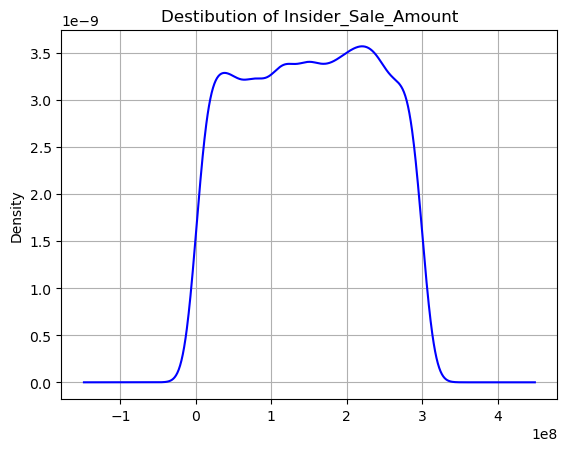

In [39]:
# check the visuslisetion
df_num.Insider_Sale_Amount.plot(kind='kde',color= 'blue')
plt.title('Destibution of Insider_Sale_Amount')
plt.grid()

**interpritation**
 - minimum insider sels aomunt is 1042335.15
 - maximun insider sels aomunt is 299971514.72
 - avrege insider sels aomunt is 151037532.87418398
 - after looking od the distubustion i conculde that the distobustion is slight normal

In [41]:
# check the column 
df_num.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Sentiment_Score_News', 'Sentiment_Score_Social',
       'Market_Sentiment', 'Insider_Sale_Frequency', 'Days_Since_Last_Sale',
       'Revenue_Growth', 'PE_Ratio', 'Insider_Sale_Likelihood',
       'Stock_Price_Impact'],
      dtype='object')

##### Insider_Sale_Volume

In [43]:
# find the minimum
df_num.Insider_Sale_Volume.min()

10164

In [44]:
# find the maxmum
df_num.Insider_Sale_Volume.max()

1999950

In [45]:
# find the averag
df_num.Insider_Sale_Volume.mean()

994809.8209

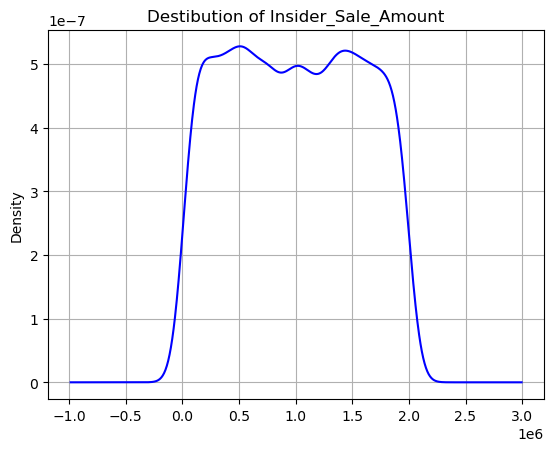

In [46]:
# check the visuslisetion
df_num.Insider_Sale_Volume.plot(kind='kde',color= 'blue')
plt.title('Destibution of Insider_Sale_Amount')
plt.grid()

**interpritation**
 - minimum insider sels aomunt is 10164
 - maximun insider sels aomunt is 1999950
 - avrege insider sels aomunt is 994809.8209
 - after looking od the distubustion i conculde that the distobustion is slight normal

# Stock_Price

In [49]:
# find the minimum
df_num.Stock_Price.min()

100.0

In [50]:
# find the maxmum
df_num.Stock_Price.max()

149.99

In [51]:
# find the averag
df_num.Stock_Price.mean()

125.066047

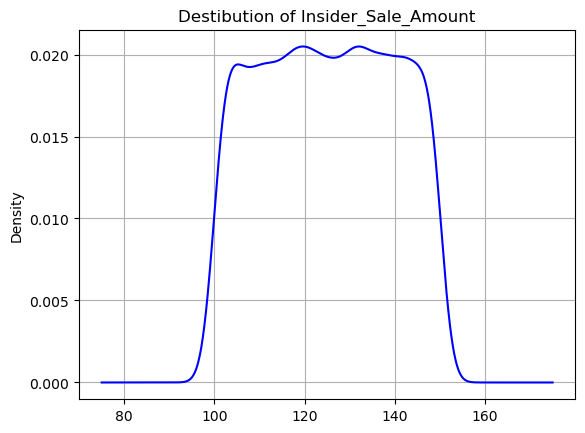

In [52]:
# check the visuslisetion
df_num.Stock_Price.plot(kind='kde',color= 'blue')
plt.title('Destibution of Insider_Sale_Amount')
plt.grid()

**interpritation**
 - minimum insider sels aomunt is 100.0
 - maximun insider sels aomunt is 149.99
 - avrege insider sels aomunt is 125.066047
 - after looking od the distubustion i conculde that the distobustion is slight normal

In [54]:
# check the column 
df_num.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Sentiment_Score_News', 'Sentiment_Score_Social',
       'Market_Sentiment', 'Insider_Sale_Frequency', 'Days_Since_Last_Sale',
       'Revenue_Growth', 'PE_Ratio', 'Insider_Sale_Likelihood',
       'Stock_Price_Impact'],
      dtype='object')

##### Stock_Price_Change_1D

In [56]:
# find the minimum
df_num.Stock_Price_Change_1D.min()

-5.0

In [57]:
# find the maxmum
df_num.Stock_Price_Change_1D.max()

5.0

In [58]:
# find the averag
df_num.Stock_Price_Change_1D.mean()

-0.05319200000000001

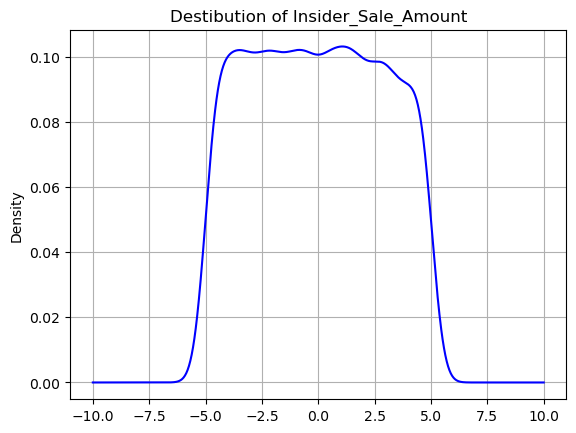

In [59]:
# check the visuslisetion
df_num.Stock_Price_Change_1D.plot(kind='kde',color= 'blue')
plt.title('Destibution of Insider_Sale_Amount')
plt.grid()

**interpritation**
 - minimum insider sels aomunt is -5.0
 - maximun insider sels aomunt is 5.0
 - avrege insider sels aomunt is -0.05319200000000001
 - after looking od the distubustion i conculde that the distobustion is slight normal

In [61]:
# check the column 
df_num.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Sentiment_Score_News', 'Sentiment_Score_Social',
       'Market_Sentiment', 'Insider_Sale_Frequency', 'Days_Since_Last_Sale',
       'Revenue_Growth', 'PE_Ratio', 'Insider_Sale_Likelihood',
       'Stock_Price_Impact'],
      dtype='object')

##### Stock_Price_Volatility

In [63]:
# find the minimum
df_num.Stock_Price_Volatility.min()

0.01

In [64]:
# find the maxmum
df_num.Stock_Price_Volatility.max()

0.05

In [65]:
# find the averag
df_num.Stock_Price_Volatility.mean()

0.029981880000000002

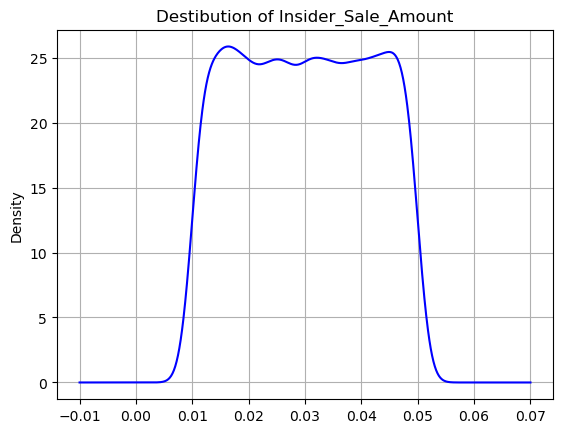

In [66]:
# check the visuslisetion
df_num.Stock_Price_Volatility.plot(kind='kde',color= 'blue')
plt.title('Destibution of Insider_Sale_Amount')
plt.grid()

**interpritation**
 - minimum insider sels aomunt is 0.01
 - maximun insider sels aomunt is 0.05
 - avrege insider sels aomunt is 0.029981880000000002
 - after looking od the distubustion i conculde that the distobustion is slight normal

In [68]:
# check the column 
df_num.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Sentiment_Score_News', 'Sentiment_Score_Social',
       'Market_Sentiment', 'Insider_Sale_Frequency', 'Days_Since_Last_Sale',
       'Revenue_Growth', 'PE_Ratio', 'Insider_Sale_Likelihood',
       'Stock_Price_Impact'],
      dtype='object')

##### Market_Cap

In [70]:
# find the minimum
df_num.Market_Cap.min()

3500027352290.43

In [71]:
# find the maxmum
df_num.Market_Cap.max()

3799997304239.65

In [72]:
# find the averag
df_num.Market_Cap.mean()

3649325642077.0415

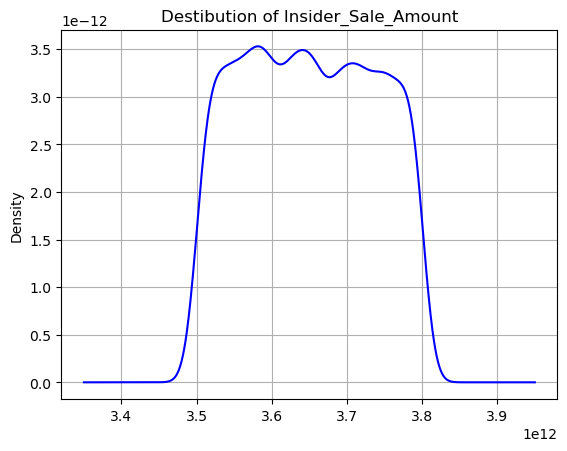

In [73]:
# check the visuslisetion
df_num.Market_Cap.plot(kind='kde',color= 'blue')
plt.title('Destibution of Insider_Sale_Amount')
plt.grid()

**interpritation**
 - minimum insider sels aomunt is 3500027352290.43
 - maximun insider sels aomunt is 3799997304239.65
 - avrege insider sels aomunt is 3649325642077.0415
 - after looking od the distubustion i conculde that the distobustion is slight normal

In [75]:
# check the column 
df_num.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Sentiment_Score_News', 'Sentiment_Score_Social',
       'Market_Sentiment', 'Insider_Sale_Frequency', 'Days_Since_Last_Sale',
       'Revenue_Growth', 'PE_Ratio', 'Insider_Sale_Likelihood',
       'Stock_Price_Impact'],
      dtype='object')

##### AI_Sector_Index

In [77]:
# find the minimum
df_num.AI_Sector_Index.min()

90.0

In [78]:
# find the maxmum
df_num.AI_Sector_Index.max()

130.0

In [79]:
# find the averag
df_num.AI_Sector_Index.mean()

109.859528

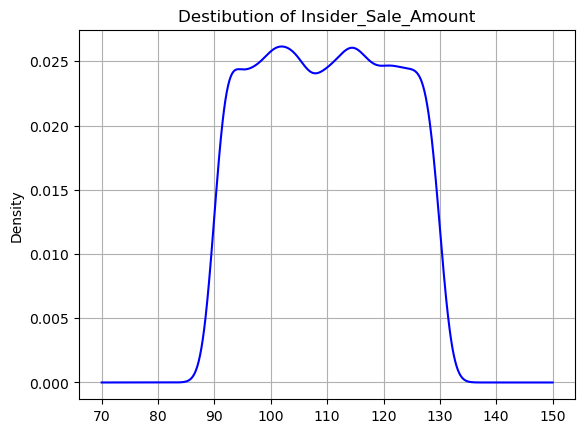

In [80]:
# check the visuslisetion
df_num.AI_Sector_Index.plot(kind='kde',color= 'blue')
plt.title('Destibution of Insider_Sale_Amount')
plt.grid()

**interpritation**
 - minimum insider sels aomunt is 90.0
 - maximun insider sels aomunt is 130.0
 - avrege insider sels aomunt is 109.859528
 - after looking od the distubustion i conculde that the distobustion is slight normal

In [82]:
# check the column 
df_num.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Sentiment_Score_News', 'Sentiment_Score_Social',
       'Market_Sentiment', 'Insider_Sale_Frequency', 'Days_Since_Last_Sale',
       'Revenue_Growth', 'PE_Ratio', 'Insider_Sale_Likelihood',
       'Stock_Price_Impact'],
      dtype='object')

##### Sentiment_Score_News

In [84]:
# find the minimum
df_num.Sentiment_Score_News.min()

-1.0

In [85]:
# find the maxmum
df_num.Sentiment_Score_News.max()

0.999

In [86]:
# find the averag
df_num.Sentiment_Score_News.mean()

0.004400199999999999

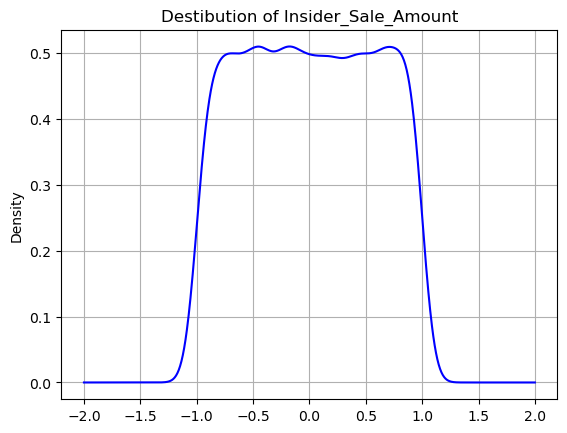

In [87]:
# check the visuslisetion
df_num.Sentiment_Score_News.plot(kind='kde',color= 'blue')
plt.title('Destibution of Insider_Sale_Amount')
plt.grid()

**interpritation**
 - minimum insider sels aomunt is -1.0
 - maximun insider sels aomunt is 0.999
 - avrege insider sels aomunt is 0.004400199999999999
 - after looking od the distubustion i conculde that the distobustion is slight normal

In [89]:
# check the column 
df_num.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Sentiment_Score_News', 'Sentiment_Score_Social',
       'Market_Sentiment', 'Insider_Sale_Frequency', 'Days_Since_Last_Sale',
       'Revenue_Growth', 'PE_Ratio', 'Insider_Sale_Likelihood',
       'Stock_Price_Impact'],
      dtype='object')

##### Sentiment_Score_Social

In [91]:
# find the minimum
df_num.Sentiment_Score_Social.min()

-1.0

In [92]:
# find the maxmum
df_num.Sentiment_Score_Social.max()

1.0

In [93]:
# find the averag
df_num.Sentiment_Score_Social.mean()

-0.0015363999999999994

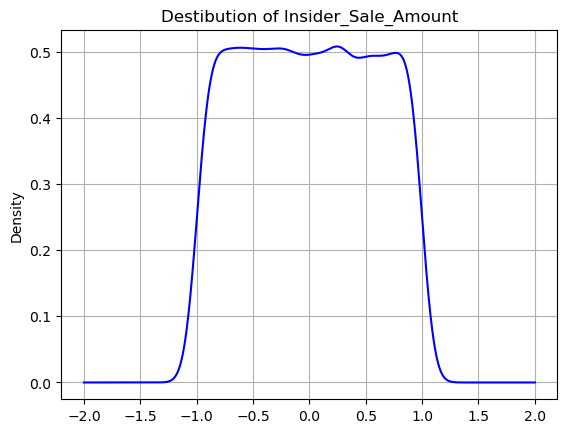

In [94]:
# check the visuslisetion
df_num.Sentiment_Score_Social.plot(kind='kde',color= 'blue')
plt.title('Destibution of Insider_Sale_Amount')
plt.grid()

**interpritation**
 - minimum insider sels aomunt is -1.0
 - maximun insider sels aomunt is 1.0
 - avrege insider sels aomunt is -0.0015363999999999994
 - after looking od the distubustion i conculde that the distobustion is slight normal

In [96]:
# check the column 
df_num.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Sentiment_Score_News', 'Sentiment_Score_Social',
       'Market_Sentiment', 'Insider_Sale_Frequency', 'Days_Since_Last_Sale',
       'Revenue_Growth', 'PE_Ratio', 'Insider_Sale_Likelihood',
       'Stock_Price_Impact'],
      dtype='object')

##### Market_Sentiment

In [98]:
# find the minimum
df_num.Market_Sentiment.min()

-2.0

In [99]:
# find the maxmum
df_num.Sentiment_Score_Social.max()

1.0

In [100]:
# find the averag
df_num.Sentiment_Score_Social.mean()

-0.0015363999999999994

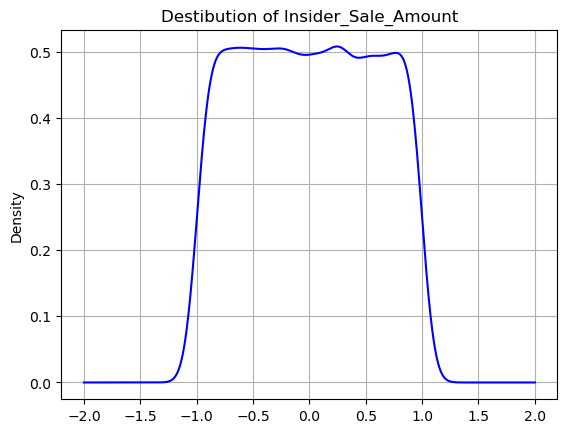

In [101]:
# check the visuslisetion
df_num.Sentiment_Score_Social.plot(kind='kde',color= 'blue')
plt.title('Destibution of Insider_Sale_Amount')
plt.grid()

**interpritation**
 - minimum insider sels aomunt is -2.0
 - maximun insider sels aomunt is 1.0
 - avrege insider sels aomunt is -0.0015363999999999994
 - after looking od the distubustion i conculde that the distobustion is slight normal

In [103]:
# check the column 
df_num.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Sentiment_Score_News', 'Sentiment_Score_Social',
       'Market_Sentiment', 'Insider_Sale_Frequency', 'Days_Since_Last_Sale',
       'Revenue_Growth', 'PE_Ratio', 'Insider_Sale_Likelihood',
       'Stock_Price_Impact'],
      dtype='object')

#### Insider_Sale_Frequency

In [105]:
# find the minimum
df_num.Insider_Sale_Frequency.min()

1

In [106]:
# find the maxmum
df_num.Insider_Sale_Frequency.max()

14

In [107]:
# find the averag
df_num.Insider_Sale_Frequency.mean()

7.4166

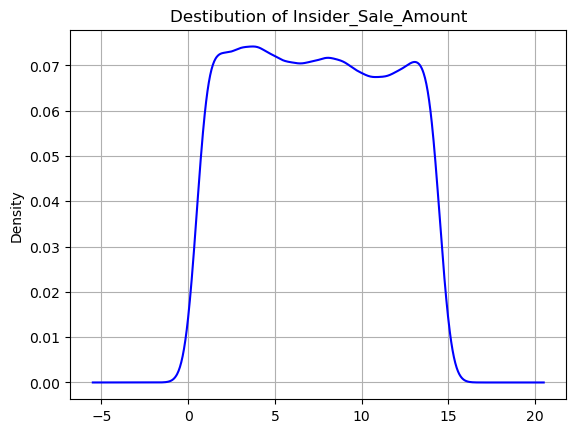

In [108]:
# check the visuslisetion
df_num.Insider_Sale_Frequency.plot(kind='kde',color= 'blue')
plt.title('Destibution of Insider_Sale_Amount')
plt.grid()

**interpritation**
 - minimum insider sels aomunt is 1
 - maximun insider sels aomunt is 14
 - avrege insider sels aomunt is 7.4166
 - after looking od the distubustion i conculde that the distobustion is slight normal

In [110]:
# check the column 
df_num.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Sentiment_Score_News', 'Sentiment_Score_Social',
       'Market_Sentiment', 'Insider_Sale_Frequency', 'Days_Since_Last_Sale',
       'Revenue_Growth', 'PE_Ratio', 'Insider_Sale_Likelihood',
       'Stock_Price_Impact'],
      dtype='object')

#### Days_Since_Last_Sale

In [112]:
# find the minimum
df_num.Days_Since_Last_Sale.min()

0

In [113]:
# find the maxmum
df_num.Days_Since_Last_Sale.max()

89

In [114]:
# find the averag
df_num.Days_Since_Last_Sale.mean()

44.5022

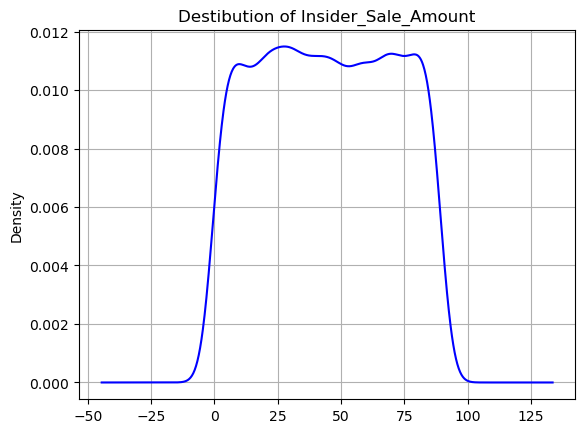

In [115]:
# check the visuslisetion
df_num.Days_Since_Last_Sale.plot(kind='kde',color= 'blue')
plt.title('Destibution of Insider_Sale_Amount')
plt.grid()

**interpritation**
 - minimum insider sels aomunt is 0
 - maximun insider sels aomunt is 89
 - avrege insider sels aomunt is 44.5022
 - after looking od the distubustion i conculde that the distobustion is slight normal

In [117]:
# check the column 
df_num.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Sentiment_Score_News', 'Sentiment_Score_Social',
       'Market_Sentiment', 'Insider_Sale_Frequency', 'Days_Since_Last_Sale',
       'Revenue_Growth', 'PE_Ratio', 'Insider_Sale_Likelihood',
       'Stock_Price_Impact'],
      dtype='object')

#### Revenue_Growth

In [119]:
# find the minimum
df_num.Revenue_Growth.min()

10.01

In [120]:
# find the maxmum
df_num.Revenue_Growth.max()

60.0

In [121]:
# find the averag
df_num.Revenue_Growth.mean()

35.028935

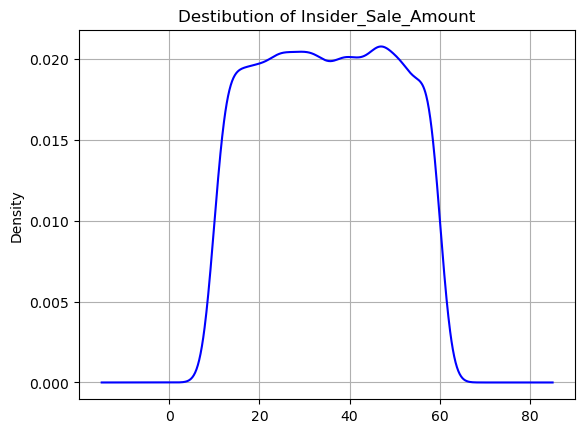

In [122]:
# check the visuslisetion
df_num.Revenue_Growth.plot(kind='kde',color= 'blue')
plt.title('Destibution of Insider_Sale_Amount')
plt.grid()

**interpritation**
 - minimum insider sels aomunt is 10.01
 - maximun insider sels aomunt is 60.0
 - avrege insider sels aomunt is 35.028935
 - after looking od the distubustion i conculde that the distobustion is slight normal

In [124]:
# check the column 
df_num.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Sentiment_Score_News', 'Sentiment_Score_Social',
       'Market_Sentiment', 'Insider_Sale_Frequency', 'Days_Since_Last_Sale',
       'Revenue_Growth', 'PE_Ratio', 'Insider_Sale_Likelihood',
       'Stock_Price_Impact'],
      dtype='object')

#### PE_Ratio

In [126]:
# find the minimum
df_num.PE_Ratio.min()

50.0

In [127]:
# find the maxmum
df_num.PE_Ratio.max()

80.0

In [128]:
# find the averag
df_num.PE_Ratio.mean()

64.93475600000001

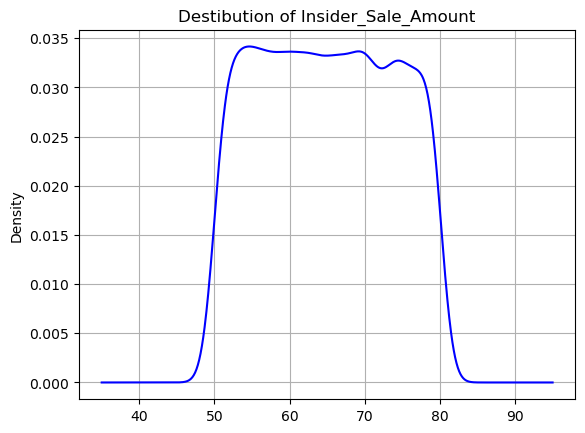

In [129]:
# check the visuslisetion
df_num.PE_Ratio.plot(kind='kde',color= 'blue')
plt.title('Destibution of Insider_Sale_Amount')
plt.grid()

**interpritation**
 - minimum insider sels aomunt is 50.0
 - maximun insider sels aomunt is 80.0
 - avrege insider sels aomunt is 64.93475600000001
 - after looking od the distubustion i conculde that the distobustion is slight normal

In [131]:
# check the column 
df_num.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Sentiment_Score_News', 'Sentiment_Score_Social',
       'Market_Sentiment', 'Insider_Sale_Frequency', 'Days_Since_Last_Sale',
       'Revenue_Growth', 'PE_Ratio', 'Insider_Sale_Likelihood',
       'Stock_Price_Impact'],
      dtype='object')

#### Insider_Sale_Likelihood

In [133]:
# find the minimum
df_num.Insider_Sale_Likelihood.min()

0.0

In [134]:
# find the maxmum
df_num.Insider_Sale_Likelihood.max()

1.0

In [135]:
# find the averag
df_num.Insider_Sale_Likelihood.mean()

0.4993959

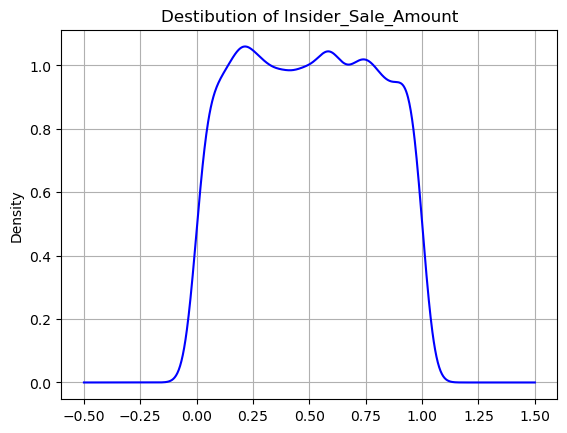

In [136]:
# check the visuslisetion
df_num.Insider_Sale_Likelihood.plot(kind='kde',color= 'blue')
plt.title('Destibution of Insider_Sale_Amount')
plt.grid()

**interpritation**
 - minimum insider sels aomunt is 0.0
 - maximun insider sels aomunt is 1.0
 - avrege insider sels aomunt is 0.4993959
 - after looking od the distubustion i conculde that the distobustion is slight normal

In [138]:
# check the column 
df_num.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Sentiment_Score_News', 'Sentiment_Score_Social',
       'Market_Sentiment', 'Insider_Sale_Frequency', 'Days_Since_Last_Sale',
       'Revenue_Growth', 'PE_Ratio', 'Insider_Sale_Likelihood',
       'Stock_Price_Impact'],
      dtype='object')

#### Stock_Price_Impact

In [140]:
# find the minimum
df_num.Stock_Price_Impact.min()

-5.0

In [141]:
# find the maxmum
df_num.Stock_Price_Impact.max()

5.0

In [142]:
# find the averag
df_num.Stock_Price_Impact.mean()

-0.001751999999999994

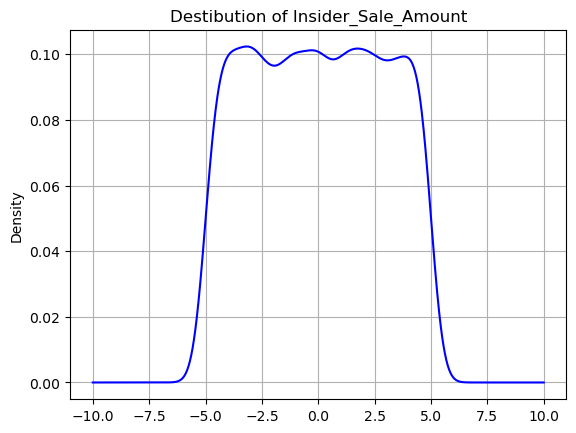

In [143]:
# check the visuslisetion
df_num.Stock_Price_Impact.plot(kind='kde',color= 'blue')
plt.title('Destibution of Insider_Sale_Amount')
plt.grid()

**interpritation**
 - minimum insider sels aomunt is -5.0
 - maximun insider sels aomunt is 5.0
 - avrege insider sels aomunt is -0.001751999999999994
 - after looking od the distubustion i conculde that the distobustion is slight normal

#### Univaiaet analysis on categorical variable

In [146]:
# cheke the column in categorical datafram
df_cat.columns

Index(['Insider_Role', 'Trading_Plan_Type', 'Sale_Date',
       'Competitor_Activity'],
      dtype='object')

##### Insider_Role

In [148]:
# check the count of each category present in the column
df_cat.Insider_Role.value_counts()

Insider_Role
CFO             1704
Board Member    1692
VP              1668
EVP             1657
CEO             1645
Director        1634
Name: count, dtype: int64

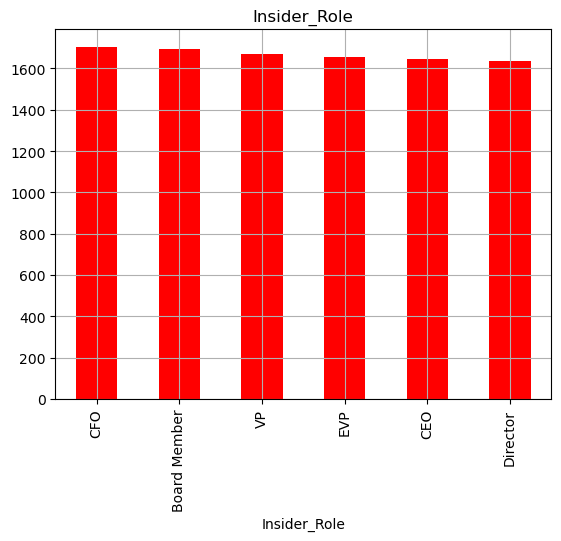

In [149]:
# creat a visualition
df_cat.Insider_Role.value_counts().plot(kind='bar',color='red')
plt.title('Insider_Role')
plt.grid()

**interpritation**
 - Data is belenced

In [151]:
# cheke the column in categorical datafram
df_cat.columns

Index(['Insider_Role', 'Trading_Plan_Type', 'Sale_Date',
       'Competitor_Activity'],
      dtype='object')

#### Trading_Plan_Type

In [153]:
# check the count of each category present in the column
df_cat.Trading_Plan_Type.value_counts()

Trading_Plan_Type
10b5-1        5033
Non-10b5-1    4967
Name: count, dtype: int64

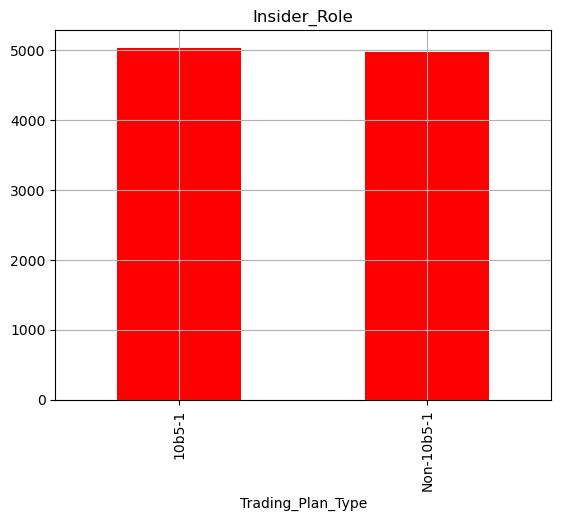

In [154]:
# creat a visualition
df_cat.Trading_Plan_Type.value_counts().plot(kind='bar',color='red')
plt.title('Insider_Role')
plt.grid()

**interpritation**
 - Data is belenced

In [156]:
# cheke the column in categorical datafram
df_cat.columns

Index(['Insider_Role', 'Trading_Plan_Type', 'Sale_Date',
       'Competitor_Activity'],
      dtype='object')

#### Sale_Date

In [158]:
# check the count of each category present in the column
df_cat.Sale_Date.value_counts()

Sale_Date
2023-01-25    22
2025-03-07    21
2023-10-05    19
2024-02-05    19
2025-03-15    19
              ..
2023-01-12     2
2025-04-05     2
2025-12-01     2
2023-11-22     2
2025-10-08     1
Name: count, Length: 1096, dtype: int64

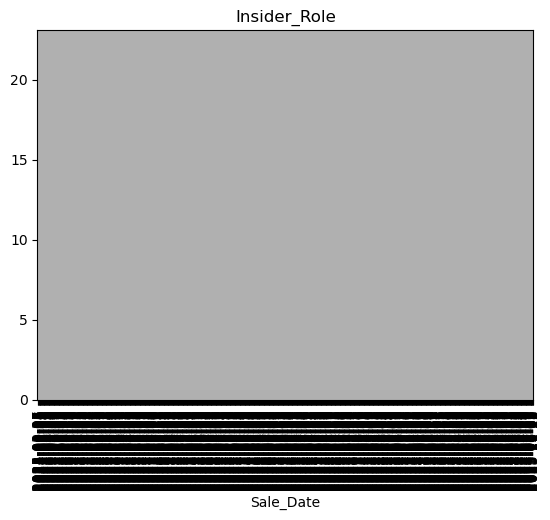

In [159]:
# creat a visualition
df_cat.Sale_Date.value_counts().plot(kind='bar',color='red')
plt.title('Insider_Role')
plt.grid()

**interpritation**
 - Data is belenced

In [161]:
# cheke the column in categorical datafram
df_cat.columns

Index(['Insider_Role', 'Trading_Plan_Type', 'Sale_Date',
       'Competitor_Activity'],
      dtype='object')

#### Competitor_Activity

In [163]:
# check the count of each category present in the column
df_cat.Competitor_Activity.value_counts()

Competitor_Activity
High      3382
Medium    3311
Low       3307
Name: count, dtype: int64

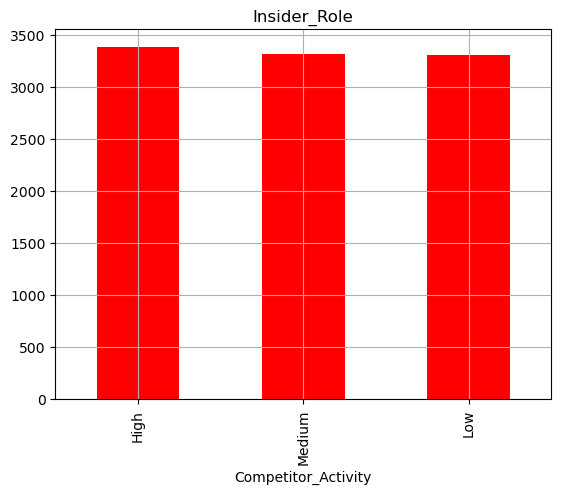

In [164]:
# creat a visualition
df_cat.Competitor_Activity.value_counts().plot(kind='bar',color='red')
plt.title('Insider_Role')
plt.grid()

**interpritation**
 - Data is belenced

# Bivariate Analysis

In [167]:

df_num.corr()

,Insider_Sale_Amount,Insider_Sale_Volume,Stock_Price,Stock_Price_Change_1D,Stock_Price_Volatility,Market_Cap,AI_Sector_Index,Sentiment_Score_News,Sentiment_Score_Social,Market_Sentiment,Insider_Sale_Frequency,Days_Since_Last_Sale,Revenue_Growth,PE_Ratio,Insider_Sale_Likelihood,Stock_Price_Impact
Insider_Sale_Amount,1.000000,-0.001489,0.010620,-0.007897,0.011394,-0.021820,0.000633,0.014077,0.000312,-0.000204,-0.027891,0.000421,-0.025713,0.000671,0.005999,-0.019589
Insider_Sale_Volume,-0.001489,1.000000,-0.001248,0.002322,-0.021168,-0.012289,-0.005766,-0.011945,0.020737,0.004583,-0.016493,-0.013179,-0.009203,0.013108,-0.001341,0.000744
Stock_Price,0.010620,-0.001248,1.000000,-0.014464,-0.010361,-0.018690,-0.015331,-0.004514,-0.014436,0.000519,-0.012126,0.014885,-0.006949,-0.007851,-0.007787,0.002120
Stock_Price_Change_1D,-0.007897,0.002322,-0.014464,1.000000,-0.016718,0.003094,0.002307,0.019801,-0.003149,-0.002355,0.002971,-0.000588,-0.006313,0.000867,-0.009110,0.000766
Stock_Price_Volatility,0.011394,-0.021168,-0.010361,-0.016718,1.000000,0.006238,-0.011922,0.014538,-0.013480,0.004357,-0.013961,-0.007784,0.005544,0.003087,0.009434,-0.013062
Market_Cap,-0.021820,-0.012289,-0.018690,0.003094,0.006238,1.000000,0.000708,0.003694,-0.011789,0.012349,-0.017005,0.004845,0.010595,-0.011113,0.009531,-0.000098
AI_Sector_Index,0.000633,-0.005766,-0.015331,0.002307,-0.011922,0.000708,1.000000,0.000563,-0.010932,0.016033,-0.002440,-0.000087,-0.020465,-0.011502,-0.004237,-0.020350
Sentiment_Score_News,0.014077,-0.011945,-0.004514,0.019801,0.014538,0.003694,0.000563,1.000000,-0.008171,0.012752,-0.003262,0.010522,0.013942,0.004559,0.002293,-0.007184
Sentiment_Score_Social,0.000312,0.020737,-0.014436,-0.003149,-0.013480,-0.011789,-0.010932,-0.008171,1.000000,0.000782,0.007317,-0.015820,-0.016008,-0.001080,-0.014416,0.002860
Market_Sentiment,-0.000204,0.004583,0.000519,-0.002355,0.004357,0.012349,0.016033,0.012752,0.000782,1.000000,0.005279,0.007341,-0.002995,0.003002,0.008711,0.005692


<Axes: >

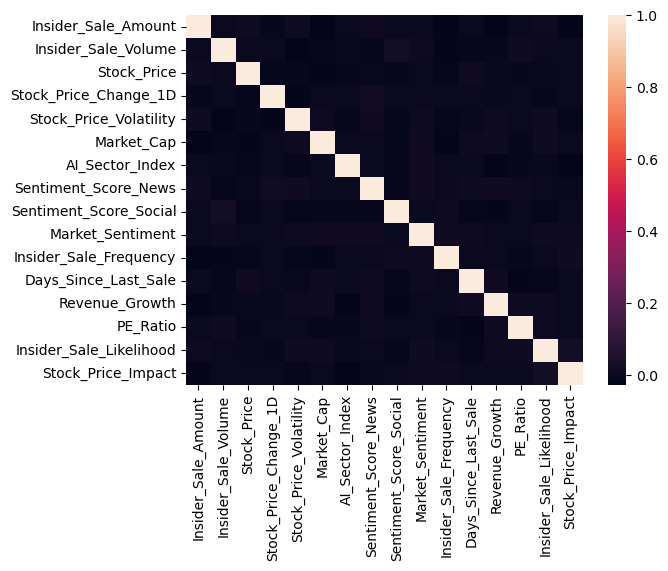

In [168]:
# visualize the correstion matrix
sns.heatmap(df_num.corr())

 **interpritation**
  - after looking for the data and correlestion matrix i concude that thre is no corelestion
  - this is represting good for machine learning becuse it avoide the problem odo multicollinearity
  - NOTE: multicollinearity means indeopendet variable are correleted with echa other and we dont multi-collinrearity while prefroming machine learninh     on any data

#### Bivariate Analysis on one categorical and one numrecal variable

In [171]:
# check the catrgorical variable we have
df_cat.columns

Index(['Insider_Role', 'Trading_Plan_Type', 'Sale_Date',
       'Competitor_Activity'],
      dtype='object')

In [172]:
# check the numrical variable present in the data
df_num.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Sentiment_Score_News', 'Sentiment_Score_Social',
       'Market_Sentiment', 'Insider_Sale_Frequency', 'Days_Since_Last_Sale',
       'Revenue_Growth', 'PE_Ratio', 'Insider_Sale_Likelihood',
       'Stock_Price_Impact'],
      dtype='object')

#### Insider_Role VS Insider_Sale_Amount

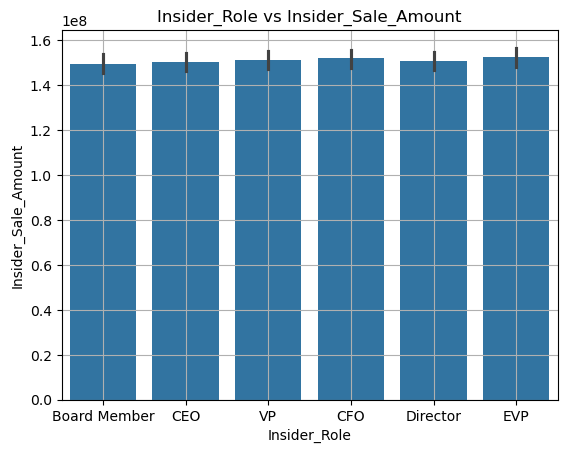

In [174]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Insider_Role,
            y = df_nvdia_insider_sales_simulated.Insider_Sale_Amount,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Insider_Role vs Insider_Sale_Amount")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Trading_Plan_Type VS Insider_Sale_Amount

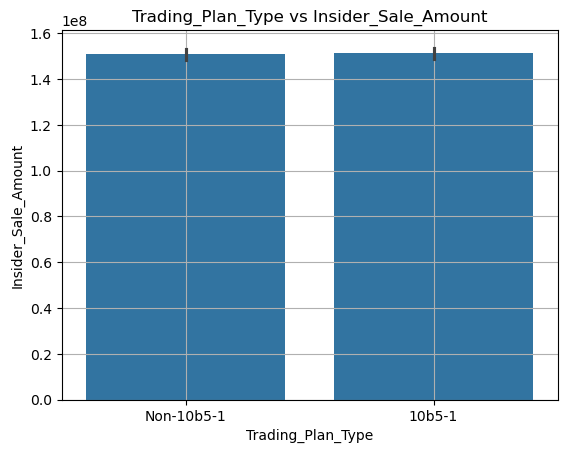

In [177]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Trading_Plan_Type,
            y = df_nvdia_insider_sales_simulated. Insider_Sale_Amount,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Trading_Plan_Type vs Insider_Sale_Amount")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Competitor_Activity VS Insider_Sale_Amount

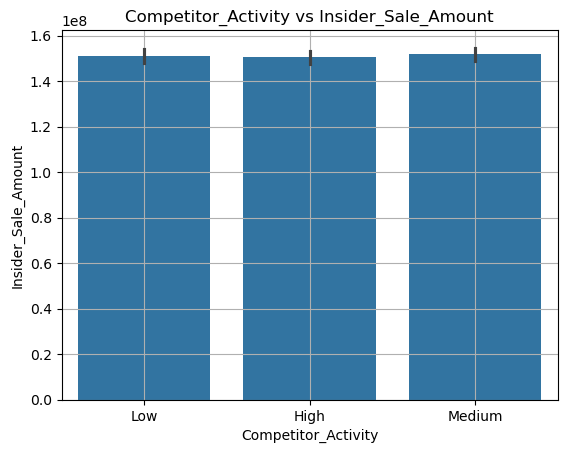

In [180]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Competitor_Activity,
            y = df_nvdia_insider_sales_simulated. Insider_Sale_Amount,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Competitor_Activity vs Insider_Sale_Amount")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Insider_Role VS Stock_Price_Volatility

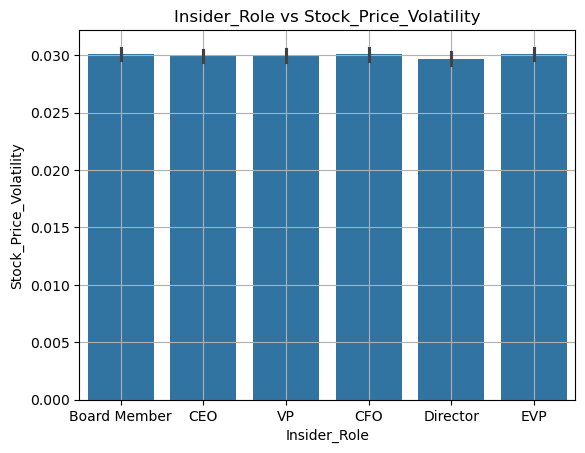

In [183]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Insider_Role,
            y = df_nvdia_insider_sales_simulated.Stock_Price_Volatility,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Insider_Role vs Stock_Price_Volatility")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Trading_Plan_Type VS Stock_Price_Volatility

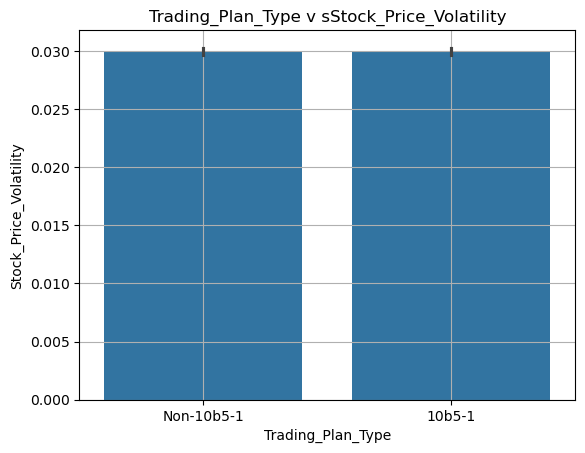

In [186]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Trading_Plan_Type,
            y = df_nvdia_insider_sales_simulated.Stock_Price_Volatility,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Trading_Plan_Type v sStock_Price_Volatility")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Competitor_Activity VS Stock_Price_Volatility

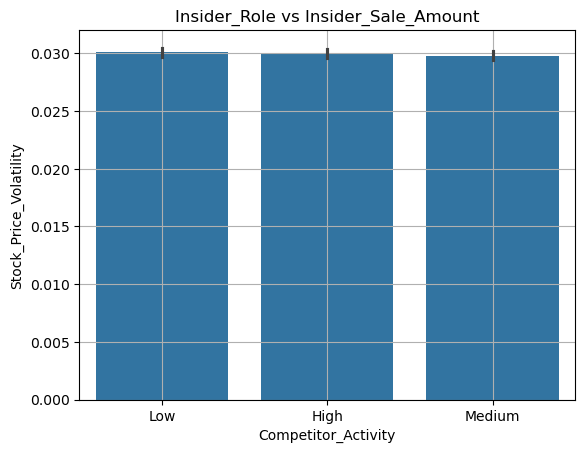

In [189]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Competitor_Activity ,
            y = df_nvdia_insider_sales_simulated.Stock_Price_Volatility,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Insider_Role vs Insider_Sale_Amount")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Insider_Role VS Stock_Price

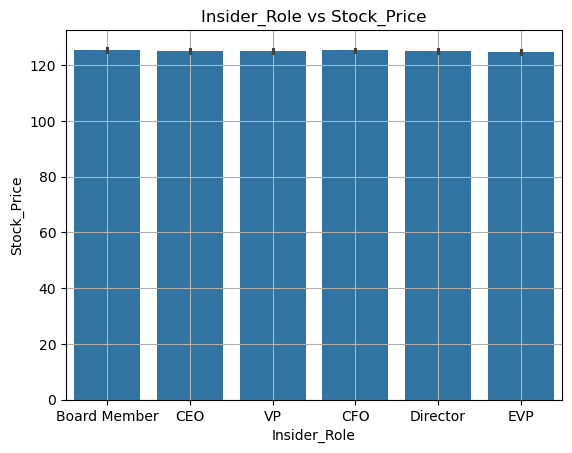

In [192]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Insider_Role,
            y = df_nvdia_insider_sales_simulated.Stock_Price,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Insider_Role vs Stock_Price")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Trading_Plan_Type VS Stock_Price

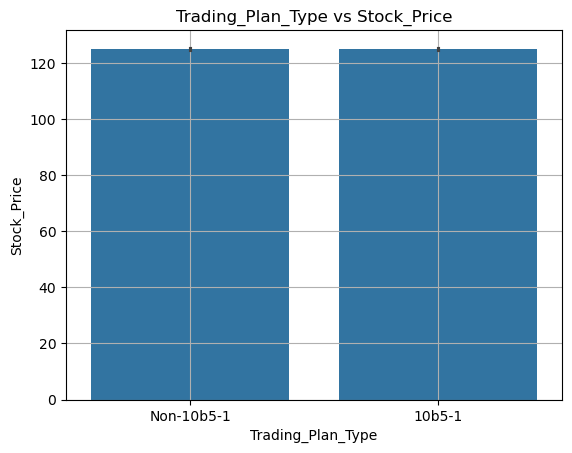

In [195]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Trading_Plan_Type,
            y = df_nvdia_insider_sales_simulated.Stock_Price,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Trading_Plan_Type vs Stock_Price")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Competitor_Activity VS Stock_Price

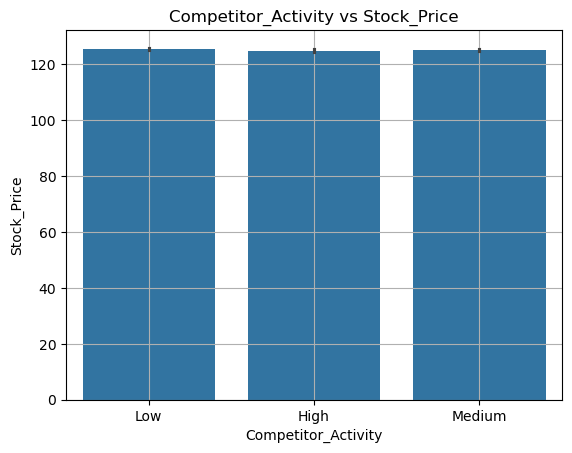

In [198]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Competitor_Activity,
            y = df_nvdia_insider_sales_simulated.Stock_Price,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Competitor_Activity vs Stock_Price")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Insider_Role VS Insider_Sale_Volume

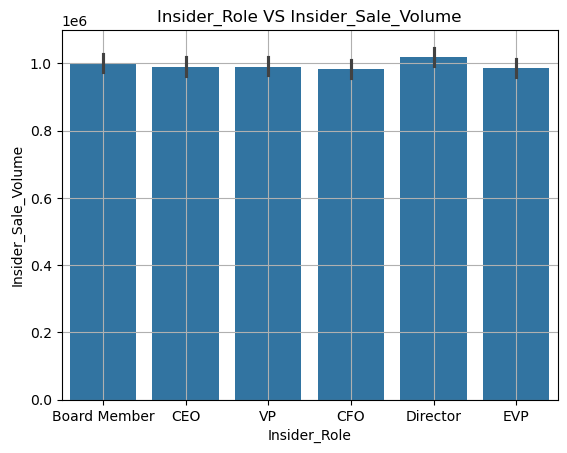

In [201]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Insider_Role,
            y = df_nvdia_insider_sales_simulated.Insider_Sale_Volume,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Insider_Role VS Insider_Sale_Volume")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Trading_Plan_Type VS Insider_Sale_Volume

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Competitor_Activity VS Insider_Sale_Volume

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Insider_Role vs Stock_Price_Change_1D

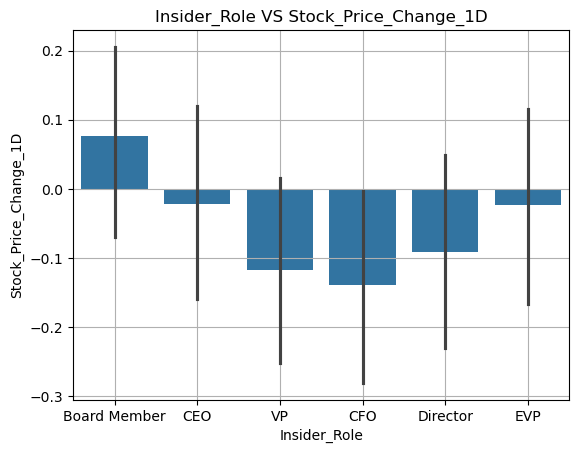

In [208]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Insider_Role,
            y = df_nvdia_insider_sales_simulated.Stock_Price_Change_1D,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Insider_Role VS Stock_Price_Change_1D")
plt.grid()
plt.show()

**interpritation**
 - Here the board member is 

## Trading_Plan_Type vs Stock_Price_Change_1D'

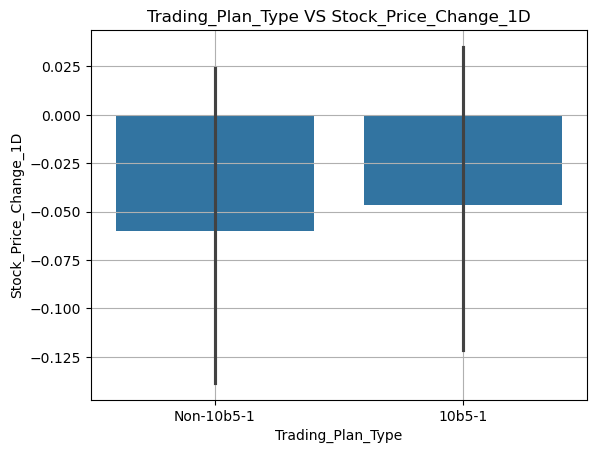

In [211]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Trading_Plan_Type,
            y = df_nvdia_insider_sales_simulated.Stock_Price_Change_1D,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Trading_Plan_Type VS Stock_Price_Change_1D")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Competitor_Activity vs stock_Price_Change_1D

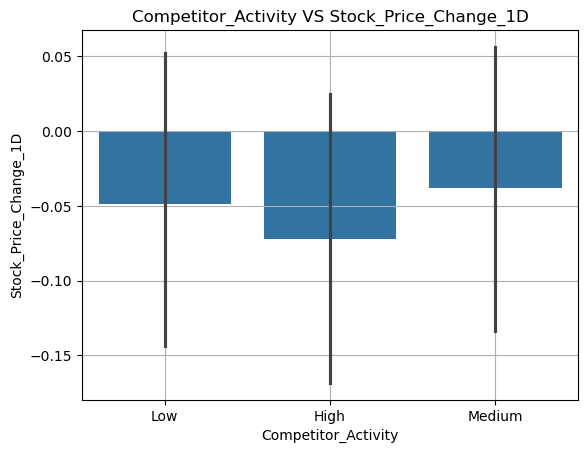

In [214]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Competitor_Activity,
            y = df_nvdia_insider_sales_simulated.Stock_Price_Change_1D,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Competitor_Activity VS Stock_Price_Change_1D")
plt.grid()
plt.show()

**interpritation**
 - the 

## Insider_Role VS Market_Cap


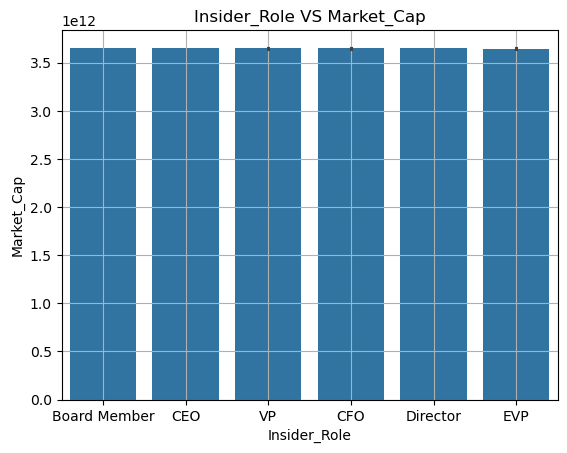

In [217]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Insider_Role,
            y = df_nvdia_insider_sales_simulated.Market_Cap,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Insider_Role VS Market_Cap")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Trading_Plan_Type VS Market_Cap


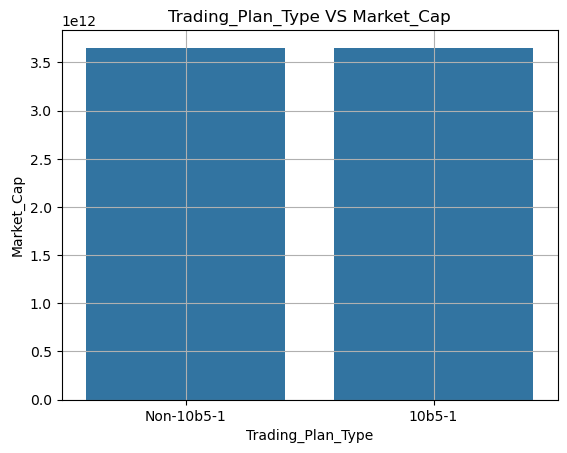

In [220]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Trading_Plan_Type,
            y = df_nvdia_insider_sales_simulated.Market_Cap,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Trading_Plan_Type VS Market_Cap")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Competitor_Activity VS Market_Cap

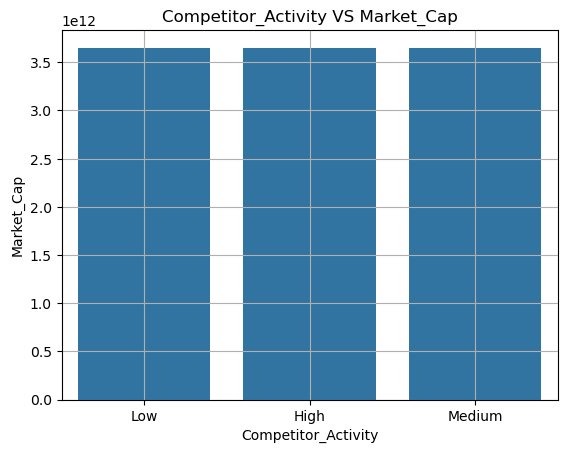

In [223]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Competitor_Activity,
            y = df_nvdia_insider_sales_simulated.Market_Cap,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Competitor_Activity VS Market_Cap")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Insider_Role VS Insider_Sale_Frequency


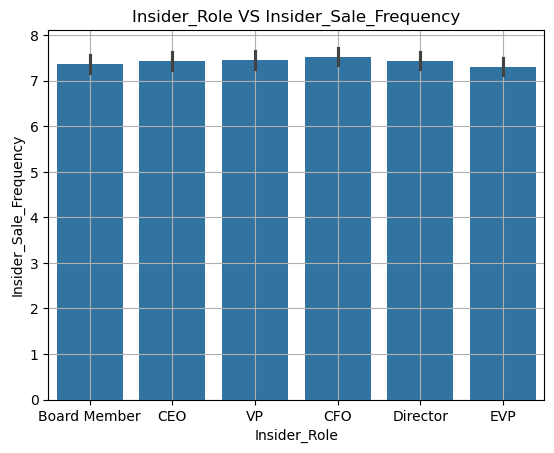

In [226]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Insider_Role,
            y = df_nvdia_insider_sales_simulated.Insider_Sale_Frequency,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Insider_Role VS Insider_Sale_Frequency")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Trading_Plan_Type VS Insider_Sale_Frequency


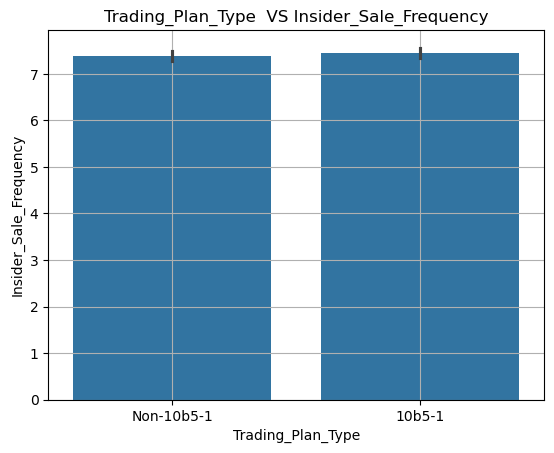

In [229]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Trading_Plan_Type ,
            y = df_nvdia_insider_sales_simulated.Insider_Sale_Frequency,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Trading_Plan_Type  VS Insider_Sale_Frequency")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Competitor_Activity VS Insider_Sale_Frequency

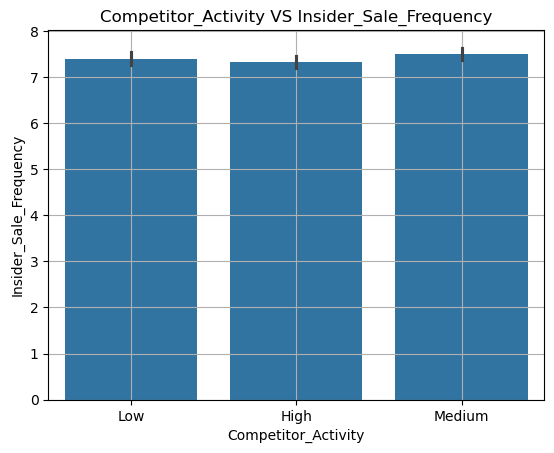

In [232]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Competitor_Activity,
            y = df_nvdia_insider_sales_simulated.Insider_Sale_Frequency,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Competitor_Activity VS Insider_Sale_Frequency")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Insider_Role VS Days_Since_Last_Sale


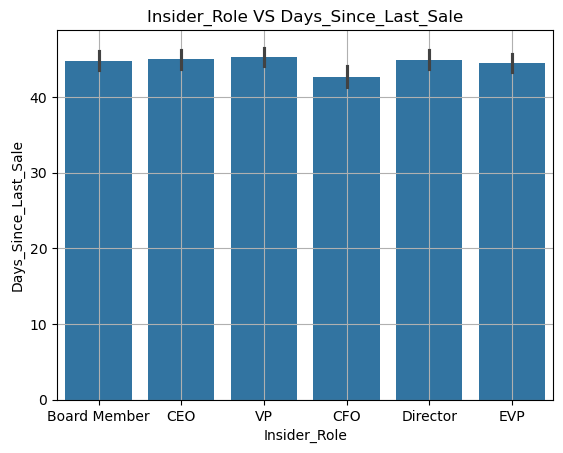

In [235]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Insider_Role,
            y = df_nvdia_insider_sales_simulated. Days_Since_Last_Sale,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Insider_Role VS Days_Since_Last_Sale")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Trading_Plan_Type VS Days_Since_Last_Sale


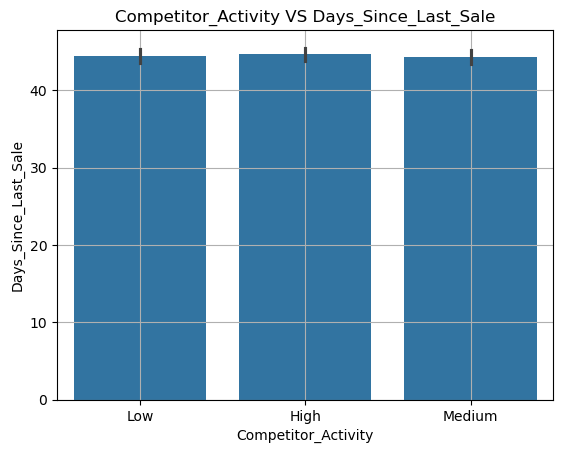

In [238]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Competitor_Activity,
            y = df_nvdia_insider_sales_simulated. Days_Since_Last_Sale,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Competitor_Activity VS Days_Since_Last_Sale")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Competitor_Activity VS Days_Since_Last_Sale


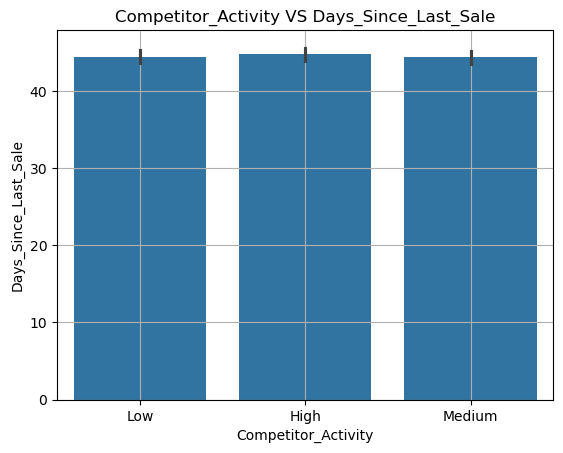

In [241]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Competitor_Activity,
            y = df_nvdia_insider_sales_simulated. Days_Since_Last_Sale,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Competitor_Activity VS Days_Since_Last_Sale")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Insider_Role VS Revenue_Growth


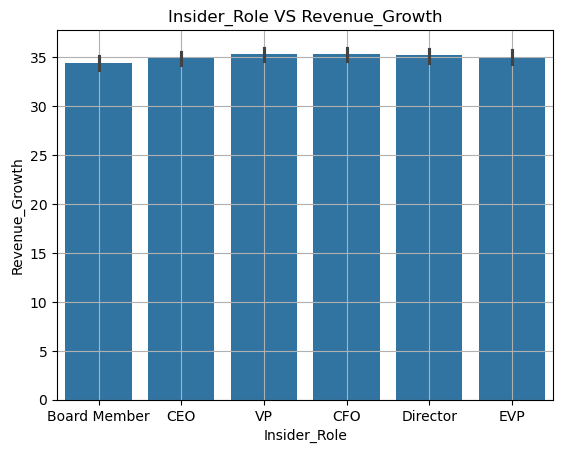

In [244]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Insider_Role,
            y = df_nvdia_insider_sales_simulated.Revenue_Growth,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Insider_Role VS Revenue_Growth")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Trading_Plan_Type VSRevenue_Growth


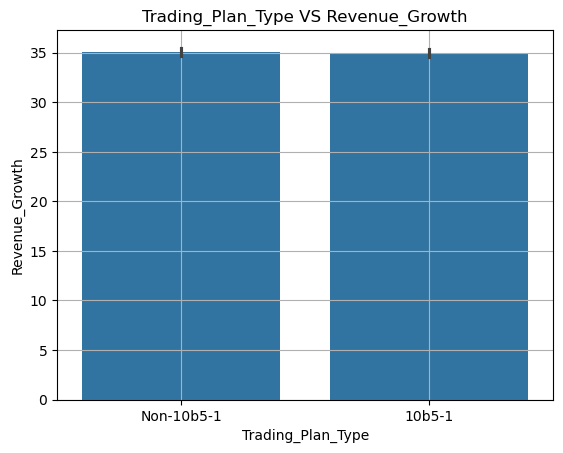

In [247]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Trading_Plan_Type,
            y = df_nvdia_insider_sales_simulated.Revenue_Growth,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Trading_Plan_Type VS Revenue_Growth")
plt.grid()
plt.show()


**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Competitor_Activity VS Revenue_Growth


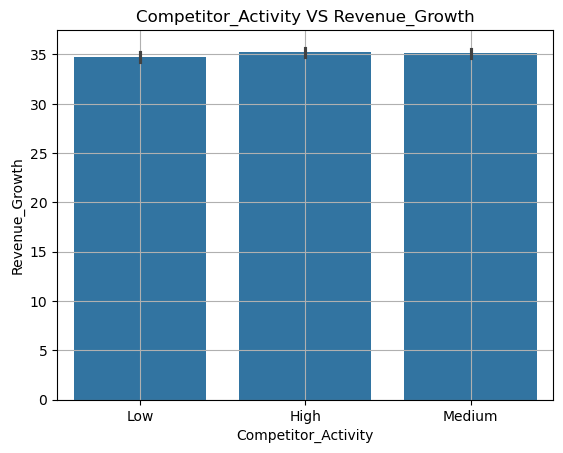

In [250]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Competitor_Activity,
            y = df_nvdia_insider_sales_simulated.Revenue_Growth,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Competitor_Activity VS Revenue_Growth")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Insider_Role VS PE_Ratio

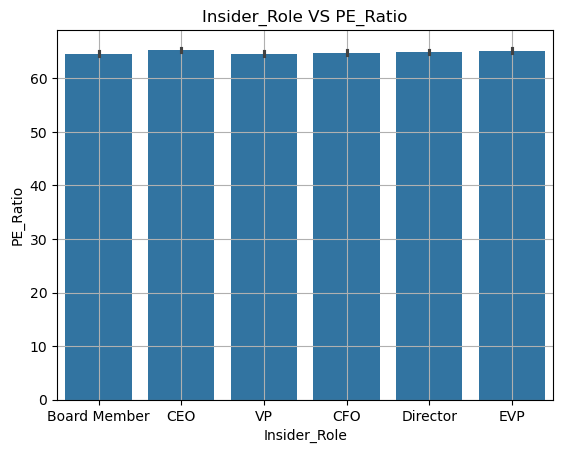

In [253]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Insider_Role,
            y = df_nvdia_insider_sales_simulated. PE_Ratio,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Insider_Role VS PE_Ratio")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Trading_Plan_Type vs PE_Ratio


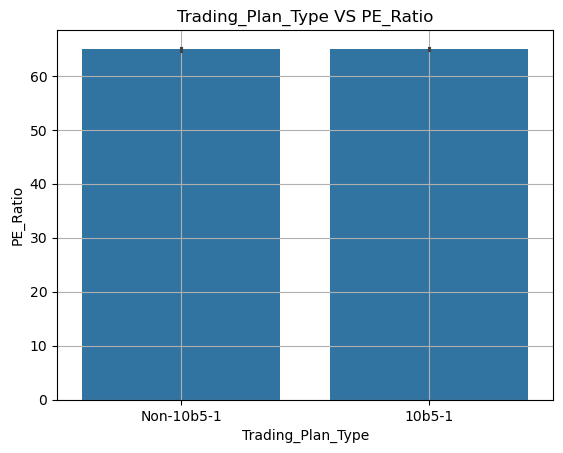

In [256]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Trading_Plan_Type,
            y = df_nvdia_insider_sales_simulated. PE_Ratio,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Trading_Plan_Type VS PE_Ratio")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Competitor_Activity vs PE_Ratio

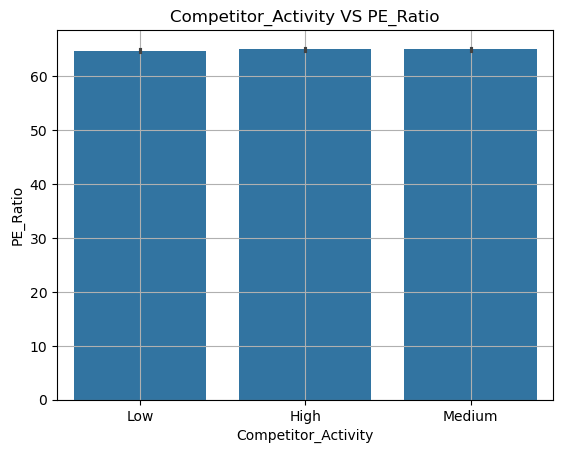

In [259]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Competitor_Activity,
            y = df_nvdia_insider_sales_simulated. PE_Ratio,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Competitor_Activity VS PE_Ratio")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Insider_Role vs Insider_Sale_Likelihood


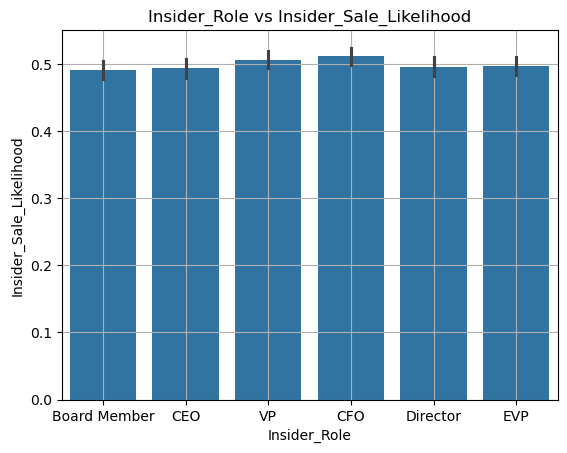

In [262]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Insider_Role,
            y = df_nvdia_insider_sales_simulated.Insider_Sale_Likelihood,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Insider_Role vs Insider_Sale_Likelihood")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Trading_Plan_Type vs Insider_Sale_Likelihood


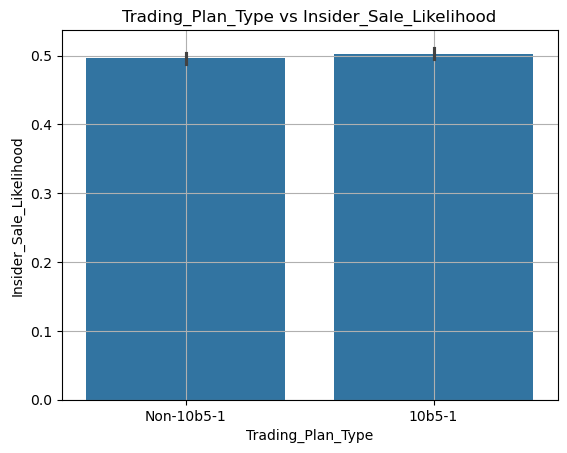

In [265]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Trading_Plan_Type,
            y = df_nvdia_insider_sales_simulated.Insider_Sale_Likelihood,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Trading_Plan_Type vs Insider_Sale_Likelihood")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Competitor_Activity vs Insider_Sale_Likelihood

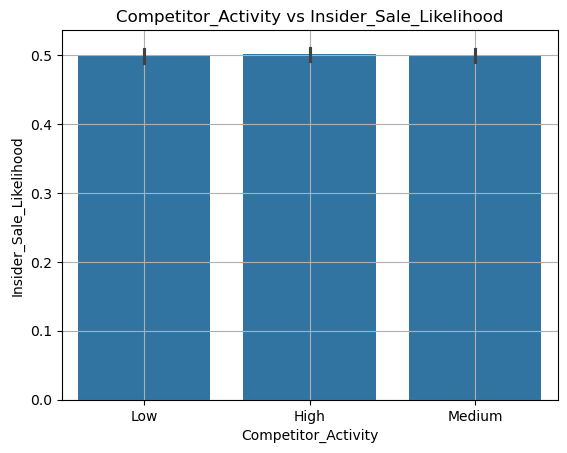

In [268]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Competitor_Activity,
            y = df_nvdia_insider_sales_simulated.Insider_Sale_Likelihood,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Competitor_Activity vs Insider_Sale_Likelihood")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Insider_Role vs Stock_Price_Impact


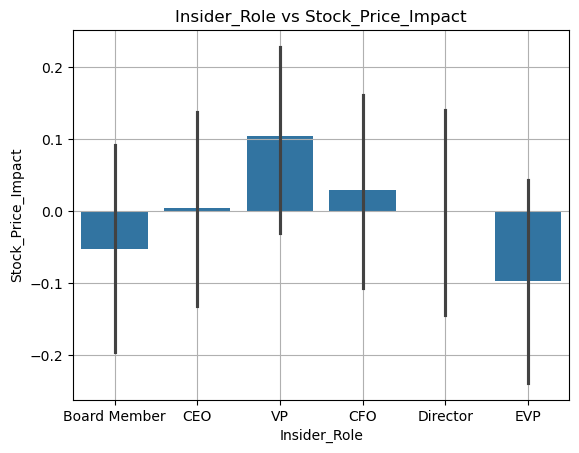

In [271]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Insider_Role,
            y = df_nvdia_insider_sales_simulated.Stock_Price_Impact,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Insider_Role vs Stock_Price_Impact")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Trading_Plan_Type vs Stock_Price_Impact


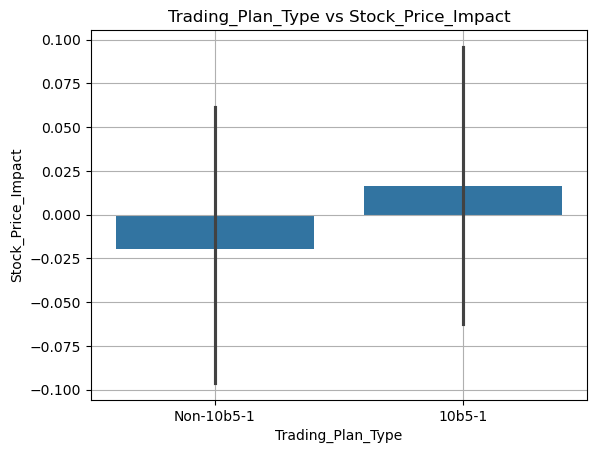

In [274]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Trading_Plan_Type,
            y = df_nvdia_insider_sales_simulated.Stock_Price_Impact,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Trading_Plan_Type vs Stock_Price_Impact")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

## Competitor_Activity VS Stock_Price_Impact

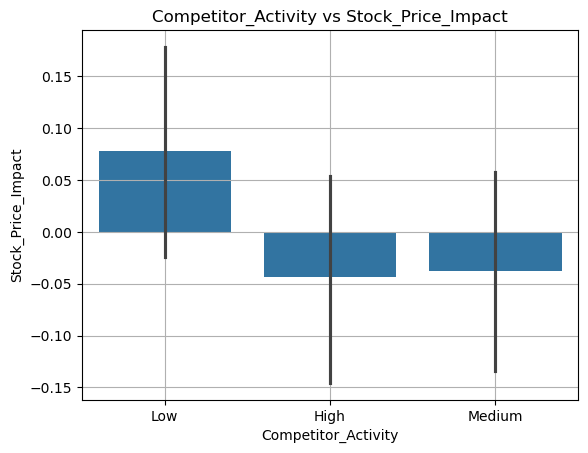

In [277]:
# creat an visulizetion
sns.barplot(x = df_nvdia_insider_sales_simulated.Competitor_Activity,
            y = df_nvdia_insider_sales_simulated.Stock_Price_Impact,
            data = df_nvdia_insider_sales_simulated,)
plt.title("Competitor_Activity vs Stock_Price_Impact")
plt.grid()
plt.show()

**interpritation**
 - the dta is belenced here  that means all  insider roles are contrubuting equal in insider seles amount

### multivariate analysis

In [280]:
# here also we have to finde the paire two cetegorical and one numrical data
# check for categorical variable
df_cat.columns

Index(['Insider_Role', 'Trading_Plan_Type', 'Sale_Date',
       'Competitor_Activity'],
      dtype='object')

In [281]:
# check for numrical variable
df_num.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Sentiment_Score_News', 'Sentiment_Score_Social',
       'Market_Sentiment', 'Insider_Sale_Frequency', 'Days_Since_Last_Sale',
       'Revenue_Growth', 'PE_Ratio', 'Insider_Sale_Likelihood',
       'Stock_Price_Impact'],
      dtype='object')

#### 'Insider_Role','Trading_Plan_Type',Insider_Sale_Amount

In [283]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Insider_Role,
              columns=df_nvdia_insider_sales_simulated.Trading_Plan_Type,
              values=df_nvdia_insider_sales_simulated.Insider_Sale_Amount,
              aggfunc='min')

Trading_Plan_Type,10b5-1,Non-10b5-1
Insider_Role,,
Board Member,1042335.15,1395031.68
CEO,1067912.11,1420832.63
CFO,1096564.13,1094032.02
Director,1381293.24,1967515.70
EVP,1694025.41,2660839.35
VP,1406264.79,2321440.05


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the minmum insider sels amount is 1042335.15
 - when the insider role is board member and treding plan type is Non-10b5-1 then minmum insider seles amount is 1395031.68

- when the inside role is CEO and trading plen type is 10b5-1 then the minmum seles amount is 1067912.11
- when the inside role is CEO and trading plen type is Non-10b5-1 then the minmum seles amount is 1420832.63

- when the inside role is CFO and trading plen type is 10b5-1 then the minmum seles amount is 1096564.13
- when the inside role is CFO and trading plen type is Non-10b5-1 then the minmum seles amount is 1094032.02

- when the inside role is Director and trading plen type is 10b5-1 then the minmum seles amount is 1381293.24	
- when the inside role is Director and trading plen type is Non-10b5-1 then the minmum seles amount is 1967515.70

- when the inside role is EVP and trading plen type is 10b5-1 then the minmum seles amount is 1694025.41	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the minmum seles amount is 2660839.35

- when the inside role is VP and trading plen type is 10b5-1 then the minmum seles amount is 1406264.79
- when the inside role is VP and trading plen type is Non-10b5-1 then the minmum seles amount is 2321440.05

In [285]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Insider_Role,
              columns=df_nvdia_insider_sales_simulated.Trading_Plan_Type,
              values=df_nvdia_insider_sales_simulated.Insider_Sale_Amount,
              aggfunc='max')

Trading_Plan_Type,10b5-1,Non-10b5-1
Insider_Role,,
Board Member,2.999449e+08,2.999673e+08
CEO,2.999715e+08,2.996073e+08
CFO,2.999014e+08,2.997920e+08
Director,2.997171e+08,2.997047e+08
EVP,2.999060e+08,2.997379e+08
VP,2.997357e+08,2.999118e+08


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the maximum insider sels amount is 2.999449e+08
 - when the insider role is board member and treding plan type is Non-10b5-1 then maximum insider seles amount is 2.999673e+08

- when the inside role is CEO and trading plen type is 10b5-1 then the maximum seles amount is 2.999715e+08
- when the inside role is CEO and trading plen type is Non-10b5-1 then the maximum seles amount is 2.996073e+08

- when the inside role is CFO and trading plen type is 10b5-1 then the maximum seles amount is 2.999014e+08
- when the inside role is CFO and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997920e+08

- when the inside role is Director and trading plen type is 10b5-1 then the maximum seles amount is 2.997171e+08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997047e+08

- when the inside role is EVP and trading plen type is 10b5-1 then the maximum seles amount is 2.999060e+08	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997379e+08

- when the inside role is VP and trading plen type is 10b5-1 then the maximum seles amount is 2.997357e+08
- when the inside role is VP and trading plen type is Non-10b5-1 then the maximum seles amount is 2.999118e+08


In [287]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Insider_Role,
              columns=df_nvdia_insider_sales_simulated.Trading_Plan_Type,
              values=df_nvdia_insider_sales_simulated.Insider_Sale_Amount,
              aggfunc='mean')

Trading_Plan_Type,10b5-1,Non-10b5-1
Insider_Role,,
Board Member,1.516241e+08,1.473368e+08
CEO,1.531981e+08,1.476759e+08
CFO,1.516167e+08,1.522531e+08
Director,1.495716e+08,1.519198e+08
EVP,1.501619e+08,1.547127e+08
VP,1.519025e+08,1.504846e+08


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the average insider sels amount is 1.516241e+08
 - when the insider role is board member and treding plan type is Non-10b5-1 then average insider seles amount is 1.473368e+08

- when the inside role is CEO and trading plen type is 10b5-1 then the average seles amount is 1.531981e+08	
- when the inside role is CEO and trading plen type is Non-10b5-1 then the average seles amount is 1.476759e+08

- when the inside role is CFO and trading plen type is 10b5-1 then the average seles amount is 1.516167e+08
- when the inside role is CFO and trading plen type is Non-10b5-1 then the average seles amount is 1.522531e+08

- when the inside role is Director and trading plen type is 10b5-1 then the average seles amount is 1.495716e+08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the average seles amount is 1.519198e+08

- when the inside role is EVP and trading plen type is 10b5-1 then the average seles amount is 1.501619e+08
- when the inside role is EVP and trading plen type is Non-10b5-1 then the average seles amount is 1.547127e+08

- when the inside role is VP and trading plen type is 10b5-1 then the average seles amount is 1.519025e+08	
- when the inside role is VP and trading plen type is Non-10b5-1 then the average seles amount is 1.504846e+08



#### 'Trading_Plan_Type', 'Competitor_Activity',Insider_Sale_Amount


In [290]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Trading_Plan_Type,
              columns=df_nvdia_insider_sales_simulated.Competitor_Activity,
              values=df_nvdia_insider_sales_simulated.Insider_Sale_Amount,
              aggfunc='min')

Competitor_Activity,High,Low,Medium
Trading_Plan_Type,,,
10b5-1,1467206.11,1096564.13,1042335.15
Non-10b5-1,1094032.02,1420832.63,1285196.81


**interpretation**
 - when the Trading_Plan_Type is 10b5-1 and trading pian type is High	 then the minmum insider sels amount is 1467206.11
 - when the Trading_Plan_Type is 10b5-1 and treding plan type is Low then minmum insider seles amount is 1096564.13
 - when the Trading_Plan_Type is 10b5-1 and treding plan type is Medium then minmum insider seles amount is 1042335.15

- when the Trading_Plan_Type is Non-10b5-1 and trading plen type is High	 then the minmum seles amount is 1094032.02
- when the Trading_Plan_Type is Non-10b5-1 and trading plen type is Low then the minmum seles amount is 1420832.63
- when the Trading_Plan_Type is Non-10b5-1 and treding plan type is Medium then minmum insider seles amount is 1285196.81



In [292]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Trading_Plan_Type,
              columns=df_nvdia_insider_sales_simulated.Competitor_Activity,
              values=df_nvdia_insider_sales_simulated.Insider_Sale_Amount,
              aggfunc='max')

Competitor_Activity,High,Low,Medium
Trading_Plan_Type,,,
10b5-1,2.997357e+08,2.999715e+08,2.999449e+08
Non-10b5-1,2.998439e+08,2.997379e+08,2.999673e+08


**interpretation**
 - when the Trading_Plan_Type is 10b5-1 and trading pian type is High	 then the minmum insider sels amount is 2.997357e+08
 - when the Trading_Plan_Type is 10b5-1 and treding plan type is Low then minmum insider seles amount is 2.999715e+08
 - when the Trading_Plan_Type is 10b5-1 and treding plan type is Medium then minmum insider seles amount is 2.999449e+08

- when the Trading_Plan_Type is Non-10b5-1 and trading plen type is High	 then the minmum seles amount is 2.998439e+08
- when the Trading_Plan_Type is Non-10b5-1 and trading plen type is Low then the minmum seles amount is 2.997379e+08
- when the Trading_Plan_Type is Non-10b5-1 and treding plan type is Medium then minmum insider seles amount is 2.999673e+08



In [294]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Trading_Plan_Type,
              columns=df_nvdia_insider_sales_simulated.Competitor_Activity,
              values=df_nvdia_insider_sales_simulated.Insider_Sale_Amount,
              aggfunc='mean')

Competitor_Activity,High,Low,Medium
Trading_Plan_Type,,,
10b5-1,1.498847e+08,1.506807e+08,1.535330e+08
Non-10b5-1,1.511326e+08,1.509522e+08,1.500494e+08


**interpretation**
 - when the Trading_Plan_Type is 10b5-1 and trading pian type is High	 then the minmum insider sels amount is 1.498847e+08
 - when the Trading_Plan_Type is 10b5-1 and treding plan type is Low then minmum insider seles amount is 1.506807e+08
 - when the Trading_Plan_Type is 10b5-1 and treding plan type is Medium then minmum insider seles amount is 1.535330e+08

- when the Trading_Plan_Type is Non-10b5-1 and trading plen type is High	 then the minmum seles amount is 1.511326e+08
- when the Trading_Plan_Type is Non-10b5-1 and trading plen type is Low then the minmum seles amount is 1.509522e+08
- when the Trading_Plan_Type is Non-10b5-1 and treding plan type is Medium then minmum insider seles amount is 1.500494e+08



#### 'Competitor_Activity','Insider_Role',Insider_Sale_Amount


In [297]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Competitor_Activity,
              columns=df_nvdia_insider_sales_simulated.Insider_Role,
              values=df_nvdia_insider_sales_simulated.Insider_Sale_Amount,
              aggfunc='min')

Insider_Role,Board Member,CEO,CFO,Director,EVP,VP
Competitor_Activity,,,,,,
High,1786634.74,1855873.12,1094032.02,1958392.40,2034412.28,1467206.11
Low,1539992.34,1420832.63,1096564.13,1381293.24,2660839.35,2580270.96
Medium,1042335.15,1067912.11,1285196.81,1383529.45,1694025.41,1406264.79


**interpretation**
 - when the Competitor_Activity	 is High and Insider_Role is Board Member then the minmum insider sels amount is 1786634.74
 - when the Competitor_Activity	 is High and Insider_Role type is CEO	 then minmum insider seles amount is 1855873.12
 - when the Competitor_Activity	 is High and Insider_Role is CFO then the minmum insider sels amount is 1094032.02
 - when the Competitor_Activity	 is High and Insider_Role type is Director	 then minmum insider seles amount is 1958392.40
 - when the Competitor_Activity	 is High and Insider_Role is EVP then the minmum insider sels amount is 2034412.28	
 - when the Competitor_Activity	 is High and Insider_Role type is VP	 then minmum insider seles amount is 1467206.11

 - when the Competitor_Activity	 is Low	 and Insider_Role is Board Member then the minmum insider sels amount is 1539992.34
 - when the Competitor_Activity	 is Low	 and Insider_Role type is CEO	 then minmum insider seles amount is 1420832.63
 - when the Competitor_Activity	 is Low	 and Insider_Role is CFO then the minmum insider sels amount is 1096564.13
 - when the Competitor_Activity	 is Low	 and Insider_Role type is Director	 then minmum insider seles amount is 1381293.24
 - when the Competitor_Activity	 is Low	 and Insider_Role is EVP then the minmum insider sels amount is 2660839.35
 - when the Competitor_Activity	 is Low	 and Insider_Role type is VP	 then minmum insider seles amount is 2580270.96

 - when the Competitor_Activity	 is Medium and Insider_Role is Board Member then the minmum insider sels amount is 1042335.15
 - when the Competitor_Activity	 is Medium  and Insider_Role type is CEO	 then minmum insider seles amount is 1067912.11
 - when the Competitor_Activity	 is Medium and Insider_Role is CFO then the minmum insider sels amount is 1285196.81
 - when the Competitor_Activity	 is Medium and Insider_Role type is Director	 then minmum insider seles amount is 1383529.45
 - when the Competitor_Activity	 is Medium and Insider_Role is EVP then the minmum insider sels amount is 1694025.41
 - when the Competitor_Activity	 is Medium and Insider_Role type is VP	 then minmum insider seles amount is 1406264.79


In [299]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Competitor_Activity,
              columns=df_nvdia_insider_sales_simulated.Insider_Role,
              values=df_nvdia_insider_sales_simulated.Insider_Sale_Amount,
              aggfunc='max')

Insider_Role,Board Member,CEO,CFO,Director,EVP,VP
Competitor_Activity,,,,,,
High,2.998439e+08,2.984400e+08,2.994821e+08,2.997171e+08,2.995394e+08,2.997357e+08
Low,2.990178e+08,2.999715e+08,2.991861e+08,2.992131e+08,2.997379e+08,2.980269e+08
Medium,2.999673e+08,2.996390e+08,2.999014e+08,2.997047e+08,2.999060e+08,2.999118e+08


**interpretation**
 - when the Competitor_Activity	 is High and Insider_Role is Board Member then the maximum insider sels amount is 2.998439e+08	
 - when the Competitor_Activity	 is High and Insider_Role type is CEO	 then maximum insider seles amount is 2.984400e+08	
 - when the Competitor_Activity	 is High and Insider_Role is CFO then the maximum insider sels amount is 2.994821e+08	
 - when the Competitor_Activity	 is High and Insider_Role type is Director	 then maximum insider seles amount is 2.997171e+08	
 - when the Competitor_Activity	 is High and Insider_Role is EVP then the maximum insider sels amount is 2.995394e+08	
 - when the Competitor_Activity	 is High and Insider_Role type is VP	 then maximum insider seles amount is 2.997357e+08

 - when the Competitor_Activity	 is Low	 and Insider_Role is Board Member then the maximum insider sels amount is 2.990178e+08	
 - when the Competitor_Activity	 is Low	 and Insider_Role type is CEO	 then maximum insider seles amount is 2.999715e+08	
 - when the Competitor_Activity	 is Low	 and Insider_Role is CFO then the maximum insider sels amount is 2.991861e+08	
 - when the Competitor_Activity	 is Low	 and Insider_Role type is Director	 then maximum insider seles amount is 2.992131e+08	
 - when the Competitor_Activity	 is Low	 and Insider_Role is EVP then the maximum insider sels amount is 2.997379e+08	
 - when the Competitor_Activity	 is Low	 and Insider_Role type is VP	 then maximum insider seles amount is 2.980269e+08

 - when the Competitor_Activity	 is Medium and Insider_Role is Board Member then the maximum insider sels amount is 2.999673e+08
 - when the Competitor_Activity	 is Medium  and Insider_Role type is CEO	 then maximum insider seles amount is 	2.996390e+08
 - when the Competitor_Activity	 is Medium and Insider_Role is CFO then the maximum insider sels amount is 	2.999014e+08	
 - when the Competitor_Activity	 is Medium and Insider_Role type is Director	 then maximum insider seles amount is 2.997047e+08	
 - when the Competitor_Activity	 is Medium and Insider_Role is EVP then the maximum insider sels amount is 2.999060e+08	
 - when the Competitor_Activity	 is Medium and Insider_Role type is VP	 then maximum insider seles amount is 	2.999118e+08


In [301]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Competitor_Activity,
              columns=df_nvdia_insider_sales_simulated.Insider_Role,
              values=df_nvdia_insider_sales_simulated.Insider_Sale_Amount,
              aggfunc='mean')

Insider_Role,Board Member,CEO,CFO,Director,EVP,VP
Competitor_Activity,,,,,,
High,1.449748e+08,1.477441e+08,1.496558e+08,1.526138e+08,1.545432e+08,1.534724e+08
Low,1.499267e+08,1.536264e+08,1.515333e+08,1.504727e+08,1.508773e+08,1.485368e+08
Medium,1.536228e+08,1.499583e+08,1.544737e+08,1.490775e+08,1.519478e+08,1.515501e+08


**interpretation**
 - when the Competitor_Activity	 is High and Insider_Role is Board Member then the average insider sels amount is 2.998439e+08	
 - when the Competitor_Activity	 is High and Insider_Role type is CEO	 then average insider seles amount is 2.984400e+08	
 - when the Competitor_Activity	 is High and Insider_Role is CFO then the average insider sels amount is 2.994821e+08	
 - when the Competitor_Activity	 is High and Insider_Role type is Director	 then average insider seles amount is 2.997171e+08	
 - when the Competitor_Activity	 is High and Insider_Role is EVP then then average  insider sels amount is 2.995394e+08	
 - when the Competitor_Activity	 is High and Insider_Role type is VP	 then average insider seles amount is 2.997357e+08

 - when the Competitor_Activity	 is Low	 and Insider_Role is Board Member then the average insider sels amount is 2.990178e+08	
 - when the Competitor_Activity	 is Low	 and Insider_Role type is CEO	 then average insider seles amount is 2.999715e+08	
 - when the Competitor_Activity	 is Low	 and Insider_Role is CFO then the average insider sels amount is 2.991861e+08	
 - when the Competitor_Activity	 is Low	 and Insider_Role type is Director	 then average insider seles amount is 2.992131e+08	
 - when the Competitor_Activity	 is Low	 and Insider_Role is EVP then the average insider sels amount is 2.997379e+08	
 - when the Competitor_Activity	 is Low	 and Insider_Role type is VP	 then average insider seles amount is 2.980269e+08

 - when the Competitor_Activity	 is Medium and Insider_Role is Board Member then the average insider sels amount is 2.999673e+08
 - when the Competitor_Activity	 is Medium  and Insider_Role type is CEO	 then average insider seles amount is 	2.996390e+08
 - when the Competitor_Activity	 is Medium and Insider_Role is CFO then the average insider sels amount is 	2.999014e+08	
 - when the Competitor_Activity	 is Medium and Insider_Role type is Director	 then average insider seles amount is 2.997047e+08	
 - when the Competitor_Activity	 is Medium and Insider_Role is EVP then the average insider sels amount is 2.999060e+08	
 - when the Competitor_Activity	 is Medium and Insider_Role type is VP	 then average insider seles amount is 	2.999118e+08


#### 'Insider_Role','Trading_Plan_Type',Insider_Sale_Volume


In [304]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Insider_Role,
              columns=df_nvdia_insider_sales_simulated.Trading_Plan_Type,
              values=df_nvdia_insider_sales_simulated.Insider_Sale_Volume,
              aggfunc='min')

Trading_Plan_Type,10b5-1,Non-10b5-1
Insider_Role,,
Board Member,10709,11511
CEO,10164,10237
CFO,10703,11345
Director,12554,13580
EVP,11489,12966
VP,21183,22732


**interpretation**
 - when the insider role is board member and trading plan type is 10b5-1 then the minmum insider sels amount is 10709	
 - when the insider role is board member and treding plan type is Non-10b5-1 then minmum insider seles amount is 11511

- when the inside role is CEO and trading plen type is 10b5-1 then the minmum seles amount is 10164	
- when the inside role is CEO and trading plen type is Non-10b5-1 then the minmum seles amount is 10237

- when the inside role is CFO and trading plen type is 10b5-1 then the minmum seles amount is 10703	
- when the inside role is CFO and trading plen type is Non-10b5-1 then the minmum seles amount is 11345

- when the inside role is Director and trading plen type is 10b5-1 then the minmum seles amount is 12554		
- when the inside role is Director and trading plen type is Non-10b5-1 then the minmum seles amount is 13580

- when the inside role is EVP and trading plen type is 10b5-1 then the minmum seles amount is 11489		
- when the inside role is EVP and trading plen type is Non-10b5-1 then the minmum seles amount is 12966

- when the inside role is VP and trading plen type is 10b5-1 then the minmum seles amount is 21183	
- when the inside role is VP and trading plen type is Non-10b5-1 then the minmum seles amount is 22732

In [306]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Insider_Role,
              columns=df_nvdia_insider_sales_simulated.Trading_Plan_Type,
              values=df_nvdia_insider_sales_simulated.Insider_Sale_Volume,
              aggfunc='max')

Trading_Plan_Type,10b5-1,Non-10b5-1
Insider_Role,,
Board Member,1998057,1997406
CEO,1997394,1998167
CFO,1997301,1997968
Director,1999772,1999950
EVP,1996531,1998479
VP,1997835,1993135


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the maximum insider sels amount is 1998057
 - when the insider role is board member and treding plan type is Non-10b5-1 then maximum insider seles amount is 1997406

- when the inside role is CEO and trading plen type is 10b5-1 then the maximum seles amount is 1997394	
- when the inside role is CEO and trading plen type is Non-10b5-1 then the maximum seles amount is 1998167

- when the inside role is CFO and trading plen type is 10b5-1 then the maximum seles amount is 1997301	
- when the inside role is CFO and trading plen type is Non-10b5-1 then the maximum seles amount is 1997968

- when the inside role is Director and trading plen type is 10b5-1 then the maximum seles amount is 1999772	
- when the inside role is Director and trading plen type is Non-10b5-1 then the maximum seles amount is 1999950	

- when the inside role is EVP and trading plen type is 10b5-1 then the maximum seles amount is 1996531	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the maximum seles amount is 1998479	

- when the inside role is VP and trading plen type is 10b5-1 then the maximum seles amount is 1997835	
- when the inside role is VP and trading plen type is Non-10b5-1 then the maximum seles amount is 1993135


In [308]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Insider_Role,
              columns=df_nvdia_insider_sales_simulated.Trading_Plan_Type,
              values=df_nvdia_insider_sales_simulated.Insider_Sale_Volume,
              aggfunc='mean')

Trading_Plan_Type,10b5-1,Non-10b5-1
Insider_Role,,
Board Member,9.984856e+05,1.000820e+06
CEO,1.008678e+06,9.708049e+05
CFO,9.771591e+05,9.911916e+05
Director,1.005481e+06,1.032644e+06
EVP,1.004405e+06,9.695645e+05
VP,9.963106e+05,9.830653e+05


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the average insider sels amount is 9.984856e+05	
 - when the insider role is board member and treding plan type is Non-10b5-1 then average insider seles amount is 1.000820e+06

- when the inside role is CEO and trading plen type is 10b5-1 then the average seles amount is 1.008678e+06	
- when the inside role is CEO and trading plen type is Non-10b5-1 then the average seles amount is 9.708049e+05

- when the inside role is CFO and trading plen type is 10b5-1 then the average seles amount is 9.771591e+05	
- when the inside role is CFO and trading plen type is Non-10b5-1 then the average seles amount is 9.911916e+05

- when the inside role is Director and trading plen type is 10b5-1 then the average seles amount is 1.005481e+06		
- when the inside role is Director and trading plen type is Non-10b5-1 then the average seles amount is 1.032644e+06

- when the inside role is EVP and trading plen type is 10b5-1 then the average seles amount is 1.004405e+06	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the average seles amount is 9.695645e+05

- when the inside role is VP and trading plen type is 10b5-1 then the average seles amount is 9.963106e+05		
- when the inside role is VP and trading plen type is Non-10b5-1 then the average seles amount is 9.830653e+05



#### 'Trading_Plan_Type', 'Competitor_Activity',Insider_Sale_Volume


In [311]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Trading_Plan_Type,
              columns=df_nvdia_insider_sales_simulated.Competitor_Activity,
              values=df_nvdia_insider_sales_simulated.Insider_Sale_Volume,
              aggfunc='min')

Competitor_Activity,High,Low,Medium
Trading_Plan_Type,,,
10b5-1,10703,10164,12018
Non-10b5-1,12966,10237,11511


**interpretation**
 - when the Trading_Plan_Type is 10b5-1 and Competitor_Activity is High	 then the minmum insider sels amount is 10703	
 - when the Trading_Plan_Type is 10b5-1 and Competitor_Activity is Low then minmum insider seles amount is 10164	
 - when the Trading_Plan_Type is 10b5-1 and Competitor_Activity is Medium then minmum insider seles amount is 12018

- when the Trading_Plan_Type is Non-10b5-1 and Competitor_Activity is High	 then the minmum seles amount is 12966	
- when the Trading_Plan_Type is Non-10b5-1 and Competitor_Activity is Low then the minmum seles amount is 10237	
- when the Trading_Plan_Type is Non-10b5-1 and Competitor_Activity is Medium then minmum insider seles amount is 11511



In [313]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Trading_Plan_Type,
              columns=df_nvdia_insider_sales_simulated.Competitor_Activity,
              values=df_nvdia_insider_sales_simulated.Insider_Sale_Volume,
              aggfunc='max')

Competitor_Activity,High,Low,Medium
Trading_Plan_Type,,,
10b5-1,1999772,1998006,1998057
Non-10b5-1,1999950,1998479,1997968


**interpretation**
 - when the Trading_Plan_Type is 10b5-1 and Competitor_Activity is High	 then the minmum insider sels amount is 1999772	
 - when the Trading_Plan_Type is 10b5-1 and Competitor_Activity is Low then minmum insider seles amount is 1998006		
 - when the Trading_Plan_Type is 10b5-1 and Competitor_Activity is Medium then minmum insider seles amount is 1998057	

- when the Trading_Plan_Type is Non-10b5-1 and Competitor_Activity is High	 then the minmum seles amount is 1999950	
- when the Trading_Plan_Type is Non-10b5-1 and Competitor_Activity is Low then the minmum seles amount is 1998479	
- when the Trading_Plan_Type is Non-10b5-1 and Competitor_Activity is Medium then minmum insider seles amount is 1997968	



In [315]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Trading_Plan_Type,
              columns=df_nvdia_insider_sales_simulated.Competitor_Activity,
              values=df_nvdia_insider_sales_simulated.Insider_Sale_Volume,
              aggfunc='mean')

Competitor_Activity,High,Low,Medium
Trading_Plan_Type,,,
10b5-1,993812.789263,1.017636e+06,984145.782143
Non-10b5-1,992593.519313,9.912684e+05,990362.746781


**interpretation**
 - when the Trading_Plan_Type is 10b5-1 and Competitor_Activity is High	 then the minmum insider sels amount is 993812.789263	
 - when the Trading_Plan_Type is 10b5-1 and Competitor_Activity is Low then minmum insider seles amount is 1.017636e+06		
 - when the Trading_Plan_Type is 10b5-1 and Competitor_Activity is Medium then minmum insider seles amount is 984145.782143

- when the Trading_Plan_Type is Non-10b5-1 and Competitor_Activity is High	 then the minmum seles amount is 992593.519313	
- when the Trading_Plan_Type is Non-10b5-1 and Competitor_Activity is Low then the minmum seles amount is 9.912684e+05		
- when the Trading_Plan_Type is Non-10b5-1 and Competitor_Activity is Medium then minmum insider seles amount is 990362.746781	



#### 'Competitor_Activity','Insider_Role',Insider_Sale_Volume

In [318]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Competitor_Activity,
              columns=df_nvdia_insider_sales_simulated.Insider_Role,
              values=df_nvdia_insider_sales_simulated.Insider_Sale_Volume,
              aggfunc='min')

Insider_Role,Board Member,CEO,CFO,Director,EVP,VP
Competitor_Activity,,,,,,
High,16464,18848,10703,15698,12966,21183
Low,10709,10164,11345,12554,11489,22732
Medium,11511,11960,12018,13406,13888,33101


**interpretation**
 - when the Competitor_Activity	 is High and Insider_Role is Board Member then the average insider sels amount is 16464	
 - when the Competitor_Activity	 is High and Insider_Role type is CEO	 then average insider seles amount is 18848		
 - when the Competitor_Activity	 is High and Insider_Role is CFO then the average insider sels amount is 10703			
 - when the Competitor_Activity	 is High and Insider_Role type is Director	 then average insider seles amount is 15698	
 - when the Competitor_Activity	 is High and Insider_Role is EVP then then average  insider sels amount is 12966		
 - when the Competitor_Activity	 is High and Insider_Role type is VP	 then average insider seles amount is 21183

 - when the Competitor_Activity	 is Low	 and Insider_Role is Board Member then the average insider sels amount is 10709	
 - when the Competitor_Activity	 is Low	 and Insider_Role type is CEO	 then average insider seles amount is 10164		
 - when the Competitor_Activity	 is Low	 and Insider_Role is CFO then the average insider sels amount is 11345		
 - when the Competitor_Activity	 is Low	 and Insider_Role type is Director	 then average insider seles amount is 12554	
 - when the Competitor_Activity	 is Low	 and Insider_Role is EVP then the average insider sels amount is 11489		
 - when the Competitor_Activity	 is Low	 and Insider_Role type is VP	 then average insider seles amount is 22732

 - when the Competitor_Activity	 is Medium and Insider_Role is Board Member then the average insider sels amount is 11511	

 - when the Competitor_Activity	 is Medium  and Insider_Role type is CEO	 then average insider seles amount is1196008
 - when the Competitor_Activity	 is Medium and Insider_Role is CFO then the average insider sels amount is	12018	08	
 - when the Competitor_Activity	 is Medium and Insider_Role type is Director	 then average insider seles amount i13406	08	
 - when the Competitor_Activity	 is Medium and Insider_Role is EVP then the average insider sels amount i13888	8	
 - when the Competitor_Activity	 is Medium and Insider_Role type is VP	 then average insider seles amount is3310108


In [320]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Competitor_Activity,
              columns=df_nvdia_insider_sales_simulated.Insider_Role,
              values=df_nvdia_insider_sales_simulated.Insider_Sale_Volume,
              aggfunc='max')

Insider_Role,Board Member,CEO,CFO,Director,EVP,VP
Competitor_Activity,,,,,,
High,1996725,1998167,1994040,1999950,1995396,1997835
Low,1998006,1995900,1997301,1997609,1998479,1994971
Medium,1998057,1997273,1997968,1992477,1996531,1997197


**interpretation**
 - when the Competitor_Activity	 is High and Insider_Role is Board Member then the average insider sels amount is 1996725	
 - when the Competitor_Activity	 is High and Insider_Role type is CEO	 then average insider seles amount is 1998167		
 - when the Competitor_Activity	 is High and Insider_Role is CFO then the average insider sels amount is 1994040			
 - when the Competitor_Activity	 is High and Insider_Role type is Director	 then average insider seles amount is 1999950	
 - when the Competitor_Activity	 is High and Insider_Role is EVP then then average  insider sels amount is 1995396		
 - when the Competitor_Activity	 is High and Insider_Role type is VP	 then average insider seles amount is 1997835

 - when the Competitor_Activity	 is Low	 and Insider_Role is Board Member then the average insider sels amount is 1998006	
 - when the Competitor_Activity	 is Low	 and Insider_Role type is CEO	 then average insider seles amount is 1995900			
 - when the Competitor_Activity	 is Low	 and Insider_Role is CFO then the average insider sels amount is 1997301		
 - when the Competitor_Activity	 is Low	 and Insider_Role type is Director	 then average insider seles amount is 1997609	
 - when the Competitor_Activity	 is Low	 and Insider_Role is EVP then the average insider sels amount is 1998479		
 - when the Competitor_Activity	 is Low	 and Insider_Role type is VP	 then average insider seles amount is 1994971

 - when the Competitor_Activity	 is Medium and Insider_Role is Board Member then the average insider sels amount is 1998057	
- when the Competitor_Activity	 is Medium  and Insider_Role type is CEO	 then average insider seles amount is 	1997273
 - when the Competitor_Activity	 is Medium and Insider_Role is CFO then the average insider sels amount is 		1997273		
 - when the Competitor_Activity	 is Medium and Insider_Role type is Director	 then average insider seles amount is 1992477		
 - when the Competitor_Activity	 is Medium and Insider_Role is EVP then the average insider sels amount is 1996531	
 - when the Competitor_Activity	 is Medium and Insider_Role type is VP	 then average insider seles amount is 	1997197


In [322]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Competitor_Activity,
              columns=df_nvdia_insider_sales_simulated.Insider_Role,
              values=df_nvdia_insider_sales_simulated.Insider_Sale_Volume,
              aggfunc='mean')

Insider_Role,Board Member,CEO,CFO,Director,EVP,VP
Competitor_Activity,,,,,,
High,9.887716e+05,996084.267986,9.959236e+05,1.045984e+06,977160.850365,9.567067e+05
Low,1.032954e+06,988324.350746,1.010532e+06,1.023542e+06,991773.169065,9.764023e+05
Medium,9.775106e+05,984087.034358,9.469935e+05,9.863622e+05,991684.616637,1.040548e+06


**interpretation**
 - when the Competitor_Activity	 is High and Insider_Role is Board Member then the average insider sels amount is 9.887716e+05
 - when the Competitor_Activity	 is High and Insider_Role type is CEO	 then average insider seles amount is 996084.267986		
 - when the Competitor_Activity	 is High and Insider_Role is CFO then the average insider sels amount is 9.959236e+05			
 - when the Competitor_Activity	 is High and Insider_Role type is Director	 then average insider seles amount is 1.045984e+06
 - when the Competitor_Activity	 is High and Insider_Role is EVP then then average  insider sels amount is 977160.850365
 - when the Competitor_Activity	 is High and Insider_Role type is VP	 then average insider seles amount is 9.567067e+05

 - when the Competitor_Activity	 is Low	 and Insider_Role is Board Member then the average insider sels amount is 1.032954e+06	
 - when the Competitor_Activity	 is Low	 and Insider_Role type is CEO	 then average insider seles amount is 	988324.350746		
 - when the Competitor_Activity	 is Low	 and Insider_Role is CFO then the average insider sels amount is 1.010532e+06		
 - when the Competitor_Activity	 is Low	 and Insider_Role type is Director	 then average insider seles amount is 1.023542e+06
 - when the Competitor_Activity	 is Low	 and Insider_Role is EVP then the average insider sels amount is 991773.169065	
 - when the Competitor_Activity	 is Low	 and Insider_Role type is VP	 then average insider seles amount is 9.764023e+05

 - when the Competitor_Activity	 is Medium and Insider_Role is Board Member then the average insider sels amount is 9.775106e+05	
- when the Competitor_Activity	 is Medium  and Insider_Role type is CEO	 then average insider seles amount is 984087.034358
 - when the Competitor_Activity	 is Medium and Insider_Role is CFO then the average insider sels amount is 	9.469935e+05	
 - when the Competitor_Activity	 is Medium and Insider_Role type is Director	 then average insider seles amount is 9.863622e+05	
 - when the Competitor_Activity	 is Medium and Insider_Role is EVP then the average insider sels amount is 991684.616637		
 - when the Competitor_Activity	 is Medium and Insider_Role type is VP	 then average insider seles amount is 	1.040548e+06


#### 'Insider_Role','Trading_Plan_Type',Stock_Price


In [325]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Insider_Role,
              columns=df_nvdia_insider_sales_simulated.Trading_Plan_Type,
              values=df_nvdia_insider_sales_simulated.Stock_Price,
              aggfunc='min')

Trading_Plan_Type,10b5-1,Non-10b5-1
Insider_Role,,
Board Member,100.07,100.00
CEO,100.05,100.03
CFO,100.02,100.13
Director,100.08,100.03
EVP,100.01,100.03
VP,100.07,100.01


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the maximum insider sels amount is 100.07	
 - when the insider role is board member and treding plan type is Non-10b5-1 then maximum insider seles amount is 100.00

- when the inside role is CEO and trading plen type is 10b5-1 then the maximum seles amount is 100.05	
- when the inside role is CEO and trading plen type is Non-10b5-1 then the maximum seles amount is 100.03

- when the inside role is CFO and trading plen type is 10b5-1 then the maximum seles amount is 100.02	
- when the inside role is CFO and trading plen type is Non-10b5-1 then the maximum seles amount is 100.13

- when the inside role is Director and trading plen type is 10b5-1 then the maximum seles amount is 100.08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the maximum seles amount is 100.03	

- when the inside role is EVP and trading plen type is 10b5-1 then the maximum seles amount is 100.01	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the maximum seles amount is 100.03	

- when the inside role is VP and trading plen type is 10b5-1 then the maximum seles amount is 100.07	
- when the inside role is VP and trading plen type is Non-10b5-1 then the maximum seles amount is 100.01


In [327]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Insider_Role,
              columns=df_nvdia_insider_sales_simulated.Trading_Plan_Type,
              values=df_nvdia_insider_sales_simulated.Stock_Price,
              aggfunc='max')

Trading_Plan_Type,10b5-1,Non-10b5-1
Insider_Role,,
Board Member,149.98,149.99
CEO,149.87,149.93
CFO,149.99,149.93
Director,149.96,149.96
EVP,149.85,149.92
VP,149.99,149.73


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the maximum insider sels amount is 100.07	
 - when the insider role is board member and treding plan type is Non-10b5-1 then maximum insider seles amount is 100.00

- when the inside role is CEO and trading plen type is 10b5-1 then the maximum seles amount is 100.05	
- when the inside role is CEO and trading plen type is Non-10b5-1 then the maximum seles amount is 100.03

- when the inside role is CFO and trading plen type is 10b5-1 then the maximum seles amount is 100.02	
- when the inside role is CFO and trading plen type is Non-10b5-1 then the maximum seles amount is 100.13

- when the inside role is Director and trading plen type is 10b5-1 then the maximum seles amount is 100.08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the maximum seles amount is 100.03	

- when the inside role is EVP and trading plen type is 10b5-1 then the maximum seles amount is 100.01	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the maximum seles amount is 100.03	

- when the inside role is VP and trading plen type is 10b5-1 then the maximum seles amount is 100.07	
- when the inside role is VP and trading plen type is Non-10b5-1 then the maximum seles amount is 100.01


In [329]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Insider_Role,
              columns=df_nvdia_insider_sales_simulated.Trading_Plan_Type,
              values=df_nvdia_insider_sales_simulated.Stock_Price,
              aggfunc='mean')

Trading_Plan_Type,10b5-1,Non-10b5-1
Insider_Role,,
Board Member,125.626467,125.469942
CEO,124.402214,125.367897
CFO,125.194482,125.289952
Director,125.608568,124.482694
EVP,124.451939,124.581298
VP,124.909218,125.403601


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the maximum insider sels amount is 100.07	
 - when the insider role is board member and treding plan type is Non-10b5-1 then maximum insider seles amount is 100.00

- when the inside role is CEO and trading plen type is 10b5-1 then the maximum seles amount is 100.05	
- when the inside role is CEO and trading plen type is Non-10b5-1 then the maximum seles amount is 100.03

- when the inside role is CFO and trading plen type is 10b5-1 then the maximum seles amount is 100.02	
- when the inside role is CFO and trading plen type is Non-10b5-1 then the maximum seles amount is 100.13

- when the inside role is Director and trading plen type is 10b5-1 then the maximum seles amount is 100.08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the maximum seles amount is 100.03	

- when the inside role is EVP and trading plen type is 10b5-1 then the maximum seles amount is 100.01	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the maximum seles amount is 100.03	

- when the inside role is VP and trading plen type is 10b5-1 then the maximum seles amount is 100.07	
- when the inside role is VP and trading plen type is Non-10b5-1 then the maximum seles amount is 100.01


#### 'Trading_Plan_Type', 'Competitor_Activity',Stock_Price

In [332]:
pd.crosstab(index=df_nvdia_insider_sales_simulated.Trading_Plan_Type,
              columns=df_nvdia_insider_sales_simulated.Competitor_Activity,
              values=df_nvdia_insider_sales_simulated.Stock_Price,
              aggfunc='min')

Competitor_Activity,High,Low,Medium
Trading_Plan_Type,,,
10b5-1,100.01,100.05,100.02
Non-10b5-1,100.00,100.01,100.03


**interpretation**
 - when the Trading_Plan_Type is 10b5-1 and Competitor_Activity is High	 then the minmum insider sels amount is 100.01		
 - when the Trading_Plan_Type is 10b5-1 and Competitor_Activity is Low then minmum insider seles amount is 100.05	
 - when the Trading_Plan_Type is 10b5-1 and Competitor_Activity is Medium then minmum insider seles amount is 100.02

- when the Trading_Plan_Type is Non-10b5-1 and Competitor_Activity is High	 then the minmum seles amount is 100.00		
- when the Trading_Plan_Type is Non-10b5-1 and Competitor_Activity is Low then the minmum seles amount is 100.01		
- when the Trading_Plan_Type is Non-10b5-1 and Competitor_Activity is Medium then minmum insider seles amount is 100.03



**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the maximum insider sels amount is 2.999449e+08
 - when the insider role is board member and treding plan type is Non-10b5-1 then maximum insider seles amount is 2.999673e+08

- when the inside role is CEO and trading plen type is 10b5-1 then the maximum seles amount is 2.999715e+08
- when the inside role is CEO and trading plen type is Non-10b5-1 then the maximum seles amount is 2.996073e+08

- when the inside role is CFO and trading plen type is 10b5-1 then the maximum seles amount is 2.999014e+08
- when the inside role is CFO and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997920e+08

- when the inside role is Director and trading plen type is 10b5-1 then the maximum seles amount is 2.997171e+08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997047e+08

- when the inside role is EVP and trading plen type is 10b5-1 then the maximum seles amount is 2.999060e+08	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997379e+08

- when the inside role is VP and trading plen type is 10b5-1 then the maximum seles amount is 2.997357e+08
- when the inside role is VP and trading plen type is Non-10b5-1 then the maximum seles amount is 2.999118e+08


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the average insider sels amount is 1.516241e+08
 - when the insider role is board member and treding plan type is Non-10b5-1 then average insider seles amount is 1.473368e+08

- when the inside role is CEO and trading plen type is 10b5-1 then the average seles amount is 1.531981e+08	
- when the inside role is CEO and trading plen type is Non-10b5-1 then the average seles amount is 1.476759e+08

- when the inside role is CFO and trading plen type is 10b5-1 then the average seles amount is 1.516167e+08
- when the inside role is CFO and trading plen type is Non-10b5-1 then the average seles amount is 1.522531e+08

- when the inside role is Director and trading plen type is 10b5-1 then the average seles amount is 1.495716e+08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the average seles amount is 1.519198e+08

- when the inside role is EVP and trading plen type is 10b5-1 then the average seles amount is 1.501619e+08
- when the inside role is EVP and trading plen type is Non-10b5-1 then the average seles amount is 1.547127e+08

- when the inside role is VP and trading plen type is 10b5-1 then the average seles amount is 1.519025e+08	
- when the inside role is VP and trading plen type is Non-10b5-1 then the average seles amount is 1.504846e+08



##### 'Competitor_Activity','Insider_Role',Stock_Price

**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the minmum insider sels amount is 1042335.15
 - when the insider role is board member and treding plan type is Non-10b5-1 then minmum insider seles amount is 1395031.68

- when the inside role is CEO and trading plen type is 10b5-1 then the minmum seles amount is 1067912.11
- when the inside role is CEO and trading plen type is Non-10b5-1 then the minmum seles amount is 1420832.63

- when the inside role is CFO and trading plen type is 10b5-1 then the minmum seles amount is 1096564.13
- when the inside role is CFO and trading plen type is Non-10b5-1 then the minmum seles amount is 1094032.02

- when the inside role is Director and trading plen type is 10b5-1 then the minmum seles amount is 1381293.24	
- when the inside role is Director and trading plen type is Non-10b5-1 then the minmum seles amount is 1967515.70

- when the inside role is EVP and trading plen type is 10b5-1 then the minmum seles amount is 1694025.41	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the minmum seles amount is 2660839.35

- when the inside role is VP and trading plen type is 10b5-1 then the minmum seles amount is 1406264.79
- when the inside role is VP and trading plen type is Non-10b5-1 then the minmum seles amount is 2321440.05

**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the maximum insider sels amount is 2.999449e+08
 - when the insider role is board member and treding plan type is Non-10b5-1 then maximum insider seles amount is 2.999673e+08

- when the inside role is CEO and trading plen type is 10b5-1 then the maximum seles amount is 2.999715e+08
- when the inside role is CEO and trading plen type is Non-10b5-1 then the maximum seles amount is 2.996073e+08

- when the inside role is CFO and trading plen type is 10b5-1 then the maximum seles amount is 2.999014e+08
- when the inside role is CFO and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997920e+08

- when the inside role is Director and trading plen type is 10b5-1 then the maximum seles amount is 2.997171e+08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997047e+08

- when the inside role is EVP and trading plen type is 10b5-1 then the maximum seles amount is 2.999060e+08	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997379e+08

- when the inside role is VP and trading plen type is 10b5-1 then the maximum seles amount is 2.997357e+08
- when the inside role is VP and trading plen type is Non-10b5-1 then the maximum seles amount is 2.999118e+08


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the average insider sels amount is 1.516241e+08
 - when the insider role is board member and treding plan type is Non-10b5-1 then average insider seles amount is 1.473368e+08

- when the inside role is CEO and trading plen type is 10b5-1 then the average seles amount is 1.531981e+08	
- when the inside role is CEO and trading plen type is Non-10b5-1 then the average seles amount is 1.476759e+08

- when the inside role is CFO and trading plen type is 10b5-1 then the average seles amount is 1.516167e+08
- when the inside role is CFO and trading plen type is Non-10b5-1 then the average seles amount is 1.522531e+08

- when the inside role is Director and trading plen type is 10b5-1 then the average seles amount is 1.495716e+08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the average seles amount is 1.519198e+08

- when the inside role is EVP and trading plen type is 10b5-1 then the average seles amount is 1.501619e+08
- when the inside role is EVP and trading plen type is Non-10b5-1 then the average seles amount is 1.547127e+08

- when the inside role is VP and trading plen type is 10b5-1 then the average seles amount is 1.519025e+08	
- when the inside role is VP and trading plen type is Non-10b5-1 then the average seles amount is 1.504846e+08



#### 'Insider_Role','Trading_Plan_Type',Stock_Price_Change_1D


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the minmum insider sels amount is 1042335.15
 - when the insider role is board member and treding plan type is Non-10b5-1 then minmum insider seles amount is 1395031.68

- when the inside role is CEO and trading plen type is 10b5-1 then the minmum seles amount is 1067912.11
- when the inside role is CEO and trading plen type is Non-10b5-1 then the minmum seles amount is 1420832.63

- when the inside role is CFO and trading plen type is 10b5-1 then the minmum seles amount is 1096564.13
- when the inside role is CFO and trading plen type is Non-10b5-1 then the minmum seles amount is 1094032.02

- when the inside role is Director and trading plen type is 10b5-1 then the minmum seles amount is 1381293.24	
- when the inside role is Director and trading plen type is Non-10b5-1 then the minmum seles amount is 1967515.70

- when the inside role is EVP and trading plen type is 10b5-1 then the minmum seles amount is 1694025.41	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the minmum seles amount is 2660839.35

- when the inside role is VP and trading plen type is 10b5-1 then the minmum seles amount is 1406264.79
- when the inside role is VP and trading plen type is Non-10b5-1 then the minmum seles amount is 2321440.05

**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the maximum insider sels amount is 2.999449e+08
 - when the insider role is board member and treding plan type is Non-10b5-1 then maximum insider seles amount is 2.999673e+08

- when the inside role is CEO and trading plen type is 10b5-1 then the maximum seles amount is 2.999715e+08
- when the inside role is CEO and trading plen type is Non-10b5-1 then the maximum seles amount is 2.996073e+08

- when the inside role is CFO and trading plen type is 10b5-1 then the maximum seles amount is 2.999014e+08
- when the inside role is CFO and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997920e+08

- when the inside role is Director and trading plen type is 10b5-1 then the maximum seles amount is 2.997171e+08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997047e+08

- when the inside role is EVP and trading plen type is 10b5-1 then the maximum seles amount is 2.999060e+08	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997379e+08

- when the inside role is VP and trading plen type is 10b5-1 then the maximum seles amount is 2.997357e+08
- when the inside role is VP and trading plen type is Non-10b5-1 then the maximum seles amount is 2.999118e+08


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the average insider sels amount is 1.516241e+08
 - when the insider role is board member and treding plan type is Non-10b5-1 then average insider seles amount is 1.473368e+08

- when the inside role is CEO and trading plen type is 10b5-1 then the average seles amount is 1.531981e+08	
- when the inside role is CEO and trading plen type is Non-10b5-1 then the average seles amount is 1.476759e+08

- when the inside role is CFO and trading plen type is 10b5-1 then the average seles amount is 1.516167e+08
- when the inside role is CFO and trading plen type is Non-10b5-1 then the average seles amount is 1.522531e+08

- when the inside role is Director and trading plen type is 10b5-1 then the average seles amount is 1.495716e+08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the average seles amount is 1.519198e+08

- when the inside role is EVP and trading plen type is 10b5-1 then the average seles amount is 1.501619e+08
- when the inside role is EVP and trading plen type is Non-10b5-1 then the average seles amount is 1.547127e+08

- when the inside role is VP and trading plen type is 10b5-1 then the average seles amount is 1.519025e+08	
- when the inside role is VP and trading plen type is Non-10b5-1 then the average seles amount is 1.504846e+08



##### 'Trading_Plan_Type', 'Competitor_Activity',Stock_Price_Change_1D


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the minmum insider sels amount is 1042335.15
 - when the insider role is board member and treding plan type is Non-10b5-1 then minmum insider seles amount is 1395031.68

- when the inside role is CEO and trading plen type is 10b5-1 then the minmum seles amount is 1067912.11
- when the inside role is CEO and trading plen type is Non-10b5-1 then the minmum seles amount is 1420832.63

- when the inside role is CFO and trading plen type is 10b5-1 then the minmum seles amount is 1096564.13
- when the inside role is CFO and trading plen type is Non-10b5-1 then the minmum seles amount is 1094032.02

- when the inside role is Director and trading plen type is 10b5-1 then the minmum seles amount is 1381293.24	
- when the inside role is Director and trading plen type is Non-10b5-1 then the minmum seles amount is 1967515.70

- when the inside role is EVP and trading plen type is 10b5-1 then the minmum seles amount is 1694025.41	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the minmum seles amount is 2660839.35

- when the inside role is VP and trading plen type is 10b5-1 then the minmum seles amount is 1406264.79
- when the inside role is VP and trading plen type is Non-10b5-1 then the minmum seles amount is 2321440.05

**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the maximum insider sels amount is 2.999449e+08
 - when the insider role is board member and treding plan type is Non-10b5-1 then maximum insider seles amount is 2.999673e+08

- when the inside role is CEO and trading plen type is 10b5-1 then the maximum seles amount is 2.999715e+08
- when the inside role is CEO and trading plen type is Non-10b5-1 then the maximum seles amount is 2.996073e+08

- when the inside role is CFO and trading plen type is 10b5-1 then the maximum seles amount is 2.999014e+08
- when the inside role is CFO and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997920e+08

- when the inside role is Director and trading plen type is 10b5-1 then the maximum seles amount is 2.997171e+08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997047e+08

- when the inside role is EVP and trading plen type is 10b5-1 then the maximum seles amount is 2.999060e+08	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997379e+08

- when the inside role is VP and trading plen type is 10b5-1 then the maximum seles amount is 2.997357e+08
- when the inside role is VP and trading plen type is Non-10b5-1 then the maximum seles amount is 2.999118e+08


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the average insider sels amount is 1.516241e+08
 - when the insider role is board member and treding plan type is Non-10b5-1 then average insider seles amount is 1.473368e+08

- when the inside role is CEO and trading plen type is 10b5-1 then the average seles amount is 1.531981e+08	
- when the inside role is CEO and trading plen type is Non-10b5-1 then the average seles amount is 1.476759e+08

- when the inside role is CFO and trading plen type is 10b5-1 then the average seles amount is 1.516167e+08
- when the inside role is CFO and trading plen type is Non-10b5-1 then the average seles amount is 1.522531e+08

- when the inside role is Director and trading plen type is 10b5-1 then the average seles amount is 1.495716e+08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the average seles amount is 1.519198e+08

- when the inside role is EVP and trading plen type is 10b5-1 then the average seles amount is 1.501619e+08
- when the inside role is EVP and trading plen type is Non-10b5-1 then the average seles amount is 1.547127e+08

- when the inside role is VP and trading plen type is 10b5-1 then the average seles amount is 1.519025e+08	
- when the inside role is VP and trading plen type is Non-10b5-1 then the average seles amount is 1.504846e+08



#### 'Competitor_Activity','Insider_Role',Stock_Price_Change_1D



**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the minmum insider sels amount is 1042335.15
 - when the insider role is board member and treding plan type is Non-10b5-1 then minmum insider seles amount is 1395031.68

- when the inside role is CEO and trading plen type is 10b5-1 then the minmum seles amount is 1067912.11
- when the inside role is CEO and trading plen type is Non-10b5-1 then the minmum seles amount is 1420832.63

- when the inside role is CFO and trading plen type is 10b5-1 then the minmum seles amount is 1096564.13
- when the inside role is CFO and trading plen type is Non-10b5-1 then the minmum seles amount is 1094032.02

- when the inside role is Director and trading plen type is 10b5-1 then the minmum seles amount is 1381293.24	
- when the inside role is Director and trading plen type is Non-10b5-1 then the minmum seles amount is 1967515.70

- when the inside role is EVP and trading plen type is 10b5-1 then the minmum seles amount is 1694025.41	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the minmum seles amount is 2660839.35

- when the inside role is VP and trading plen type is 10b5-1 then the minmum seles amount is 1406264.79
- when the inside role is VP and trading plen type is Non-10b5-1 then the minmum seles amount is 2321440.05

**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the maximum insider sels amount is 2.999449e+08
 - when the insider role is board member and treding plan type is Non-10b5-1 then maximum insider seles amount is 2.999673e+08

- when the inside role is CEO and trading plen type is 10b5-1 then the maximum seles amount is 2.999715e+08
- when the inside role is CEO and trading plen type is Non-10b5-1 then the maximum seles amount is 2.996073e+08

- when the inside role is CFO and trading plen type is 10b5-1 then the maximum seles amount is 2.999014e+08
- when the inside role is CFO and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997920e+08

- when the inside role is Director and trading plen type is 10b5-1 then the maximum seles amount is 2.997171e+08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997047e+08

- when the inside role is EVP and trading plen type is 10b5-1 then the maximum seles amount is 2.999060e+08	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997379e+08

- when the inside role is VP and trading plen type is 10b5-1 then the maximum seles amount is 2.997357e+08
- when the inside role is VP and trading plen type is Non-10b5-1 then the maximum seles amount is 2.999118e+08


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the average insider sels amount is 1.516241e+08
 - when the insider role is board member and treding plan type is Non-10b5-1 then average insider seles amount is 1.473368e+08

- when the inside role is CEO and trading plen type is 10b5-1 then the average seles amount is 1.531981e+08	
- when the inside role is CEO and trading plen type is Non-10b5-1 then the average seles amount is 1.476759e+08

- when the inside role is CFO and trading plen type is 10b5-1 then the average seles amount is 1.516167e+08
- when the inside role is CFO and trading plen type is Non-10b5-1 then the average seles amount is 1.522531e+08

- when the inside role is Director and trading plen type is 10b5-1 then the average seles amount is 1.495716e+08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the average seles amount is 1.519198e+08

- when the inside role is EVP and trading plen type is 10b5-1 then the average seles amount is 1.501619e+08
- when the inside role is EVP and trading plen type is Non-10b5-1 then the average seles amount is 1.547127e+08

- when the inside role is VP and trading plen type is 10b5-1 then the average seles amount is 1.519025e+08	
- when the inside role is VP and trading plen type is Non-10b5-1 then the average seles amount is 1.504846e+08



#### 'Insider_Role','Trading_Plan_Type',Stock_Price_Volatility


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the minmum insider sels amount is 1042335.15
 - when the insider role is board member and treding plan type is Non-10b5-1 then minmum insider seles amount is 1395031.68

- when the inside role is CEO and trading plen type is 10b5-1 then the minmum seles amount is 1067912.11
- when the inside role is CEO and trading plen type is Non-10b5-1 then the minmum seles amount is 1420832.63

- when the inside role is CFO and trading plen type is 10b5-1 then the minmum seles amount is 1096564.13
- when the inside role is CFO and trading plen type is Non-10b5-1 then the minmum seles amount is 1094032.02

- when the inside role is Director and trading plen type is 10b5-1 then the minmum seles amount is 1381293.24	
- when the inside role is Director and trading plen type is Non-10b5-1 then the minmum seles amount is 1967515.70

- when the inside role is EVP and trading plen type is 10b5-1 then the minmum seles amount is 1694025.41	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the minmum seles amount is 2660839.35

- when the inside role is VP and trading plen type is 10b5-1 then the minmum seles amount is 1406264.79
- when the inside role is VP and trading plen type is Non-10b5-1 then the minmum seles amount is 2321440.05

**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the maximum insider sels amount is 2.999449e+08
 - when the insider role is board member and treding plan type is Non-10b5-1 then maximum insider seles amount is 2.999673e+08

- when the inside role is CEO and trading plen type is 10b5-1 then the maximum seles amount is 2.999715e+08
- when the inside role is CEO and trading plen type is Non-10b5-1 then the maximum seles amount is 2.996073e+08

- when the inside role is CFO and trading plen type is 10b5-1 then the maximum seles amount is 2.999014e+08
- when the inside role is CFO and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997920e+08

- when the inside role is Director and trading plen type is 10b5-1 then the maximum seles amount is 2.997171e+08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997047e+08

- when the inside role is EVP and trading plen type is 10b5-1 then the maximum seles amount is 2.999060e+08	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997379e+08

- when the inside role is VP and trading plen type is 10b5-1 then the maximum seles amount is 2.997357e+08
- when the inside role is VP and trading plen type is Non-10b5-1 then the maximum seles amount is 2.999118e+08


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the average insider sels amount is 1.516241e+08
 - when the insider role is board member and treding plan type is Non-10b5-1 then average insider seles amount is 1.473368e+08

- when the inside role is CEO and trading plen type is 10b5-1 then the average seles amount is 1.531981e+08	
- when the inside role is CEO and trading plen type is Non-10b5-1 then the average seles amount is 1.476759e+08

- when the inside role is CFO and trading plen type is 10b5-1 then the average seles amount is 1.516167e+08
- when the inside role is CFO and trading plen type is Non-10b5-1 then the average seles amount is 1.522531e+08

- when the inside role is Director and trading plen type is 10b5-1 then the average seles amount is 1.495716e+08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the average seles amount is 1.519198e+08

- when the inside role is EVP and trading plen type is 10b5-1 then the average seles amount is 1.501619e+08
- when the inside role is EVP and trading plen type is Non-10b5-1 then the average seles amount is 1.547127e+08

- when the inside role is VP and trading plen type is 10b5-1 then the average seles amount is 1.519025e+08	
- when the inside role is VP and trading plen type is Non-10b5-1 then the average seles amount is 1.504846e+08



#### 'Trading_Plan_Type', 'Competitor_Activity',Stock_Price_Volatility


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the minmum insider sels amount is 1042335.15
 - when the insider role is board member and treding plan type is Non-10b5-1 then minmum insider seles amount is 1395031.68

- when the inside role is CEO and trading plen type is 10b5-1 then the minmum seles amount is 1067912.11
- when the inside role is CEO and trading plen type is Non-10b5-1 then the minmum seles amount is 1420832.63

- when the inside role is CFO and trading plen type is 10b5-1 then the minmum seles amount is 1096564.13
- when the inside role is CFO and trading plen type is Non-10b5-1 then the minmum seles amount is 1094032.02

- when the inside role is Director and trading plen type is 10b5-1 then the minmum seles amount is 1381293.24	
- when the inside role is Director and trading plen type is Non-10b5-1 then the minmum seles amount is 1967515.70

- when the inside role is EVP and trading plen type is 10b5-1 then the minmum seles amount is 1694025.41	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the minmum seles amount is 2660839.35

- when the inside role is VP and trading plen type is 10b5-1 then the minmum seles amount is 1406264.79
- when the inside role is VP and trading plen type is Non-10b5-1 then the minmum seles amount is 2321440.05

**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the maximum insider sels amount is 2.999449e+08
 - when the insider role is board member and treding plan type is Non-10b5-1 then maximum insider seles amount is 2.999673e+08

- when the inside role is CEO and trading plen type is 10b5-1 then the maximum seles amount is 2.999715e+08
- when the inside role is CEO and trading plen type is Non-10b5-1 then the maximum seles amount is 2.996073e+08

- when the inside role is CFO and trading plen type is 10b5-1 then the maximum seles amount is 2.999014e+08
- when the inside role is CFO and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997920e+08

- when the inside role is Director and trading plen type is 10b5-1 then the maximum seles amount is 2.997171e+08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997047e+08

- when the inside role is EVP and trading plen type is 10b5-1 then the maximum seles amount is 2.999060e+08	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997379e+08

- when the inside role is VP and trading plen type is 10b5-1 then the maximum seles amount is 2.997357e+08
- when the inside role is VP and trading plen type is Non-10b5-1 then the maximum seles amount is 2.999118e+08


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the average insider sels amount is 1.516241e+08
 - when the insider role is board member and treding plan type is Non-10b5-1 then average insider seles amount is 1.473368e+08

- when the inside role is CEO and trading plen type is 10b5-1 then the average seles amount is 1.531981e+08	
- when the inside role is CEO and trading plen type is Non-10b5-1 then the average seles amount is 1.476759e+08

- when the inside role is CFO and trading plen type is 10b5-1 then the average seles amount is 1.516167e+08
- when the inside role is CFO and trading plen type is Non-10b5-1 then the average seles amount is 1.522531e+08

- when the inside role is Director and trading plen type is 10b5-1 then the average seles amount is 1.495716e+08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the average seles amount is 1.519198e+08

- when the inside role is EVP and trading plen type is 10b5-1 then the average seles amount is 1.501619e+08
- when the inside role is EVP and trading plen type is Non-10b5-1 then the average seles amount is 1.547127e+08

- when the inside role is VP and trading plen type is 10b5-1 then the average seles amount is 1.519025e+08	
- when the inside role is VP and trading plen type is Non-10b5-1 then the average seles amount is 1.504846e+08



#### 'Competitor_Activity','Insider_Role',Stock_Price_Volatility



**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the minmum insider sels amount is 1042335.15
 - when the insider role is board member and treding plan type is Non-10b5-1 then minmum insider seles amount is 1395031.68

- when the inside role is CEO and trading plen type is 10b5-1 then the minmum seles amount is 1067912.11
- when the inside role is CEO and trading plen type is Non-10b5-1 then the minmum seles amount is 1420832.63

- when the inside role is CFO and trading plen type is 10b5-1 then the minmum seles amount is 1096564.13
- when the inside role is CFO and trading plen type is Non-10b5-1 then the minmum seles amount is 1094032.02

- when the inside role is Director and trading plen type is 10b5-1 then the minmum seles amount is 1381293.24	
- when the inside role is Director and trading plen type is Non-10b5-1 then the minmum seles amount is 1967515.70

- when the inside role is EVP and trading plen type is 10b5-1 then the minmum seles amount is 1694025.41	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the minmum seles amount is 2660839.35

- when the inside role is VP and trading plen type is 10b5-1 then the minmum seles amount is 1406264.79
- when the inside role is VP and trading plen type is Non-10b5-1 then the minmum seles amount is 2321440.05

**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the maximum insider sels amount is 2.999449e+08
 - when the insider role is board member and treding plan type is Non-10b5-1 then maximum insider seles amount is 2.999673e+08

- when the inside role is CEO and trading plen type is 10b5-1 then the maximum seles amount is 2.999715e+08
- when the inside role is CEO and trading plen type is Non-10b5-1 then the maximum seles amount is 2.996073e+08

- when the inside role is CFO and trading plen type is 10b5-1 then the maximum seles amount is 2.999014e+08
- when the inside role is CFO and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997920e+08

- when the inside role is Director and trading plen type is 10b5-1 then the maximum seles amount is 2.997171e+08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997047e+08

- when the inside role is EVP and trading plen type is 10b5-1 then the maximum seles amount is 2.999060e+08	
- when the inside role is EVP and trading plen type is Non-10b5-1 then the maximum seles amount is 2.997379e+08

- when the inside role is VP and trading plen type is 10b5-1 then the maximum seles amount is 2.997357e+08
- when the inside role is VP and trading plen type is Non-10b5-1 then the maximum seles amount is 2.999118e+08


**interpretation**
 - when the insider role is board member and trading pian type is 10b5-1 then the average insider sels amount is 1.516241e+08
 - when the insider role is board member and treding plan type is Non-10b5-1 then average insider seles amount is 1.473368e+08

- when the inside role is CEO and trading plen type is 10b5-1 then the average seles amount is 1.531981e+08	
- when the inside role is CEO and trading plen type is Non-10b5-1 then the average seles amount is 1.476759e+08

- when the inside role is CFO and trading plen type is 10b5-1 then the average seles amount is 1.516167e+08
- when the inside role is CFO and trading plen type is Non-10b5-1 then the average seles amount is 1.522531e+08

- when the inside role is Director and trading plen type is 10b5-1 then the average seles amount is 1.495716e+08	
- when the inside role is Director and trading plen type is Non-10b5-1 then the average seles amount is 1.519198e+08

- when the inside role is EVP and trading plen type is 10b5-1 then the average seles amount is 1.501619e+08
- when the inside role is EVP and trading plen type is Non-10b5-1 then the average seles amount is 1.547127e+08

- when the inside role is VP and trading plen type is 10b5-1 then the average seles amount is 1.519025e+08	
- when the inside role is VP and trading plen type is Non-10b5-1 then the average seles amount is 1.504846e+08



#### 'Insider_Role','Trading_Plan_Type',Market_Cap


#### 'Trading_Plan_Type', 'Competitor_Activity',Market_Cap


#### 'Competitor_Activity','Insider_Role',Market_Cap



####  'Insider_Role','Trading_Plan_Type',AI_Sector_Index


#### 'Trading_Plan_Type', 'Competitor_Activity',AI_Sector_Index


#### 'Competitor_Activity','Insider_Role',AI_Sector_Index

#### 'Insider_Role','Trading_Plan_Type',Sentiment_Score_News

#### 'Trading_Plan_Type', 'Competitor_Activity',Sentiment_Score_News


#### 'Competitor_Activity','Insider_Role',Sentiment_Score_News

## Make the dta ready for machine learning

In [374]:
# Sepret the dependent and independent variables
df_nvdia_insider_sales_simulated.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Insider_Role',
       'Trading_Plan_Type', 'Sale_Date', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Competitor_Activity', 'Sentiment_Score_News',
       'Sentiment_Score_Social', 'Market_Sentiment', 'Insider_Sale_Frequency',
       'Days_Since_Last_Sale', 'Revenue_Growth', 'PE_Ratio',
       'Insider_Sale_Likelihood', 'Stock_Price_Impact'],
      dtype='object')

In [375]:
# Here the data we are going to predite stock impect
target=df_nvdia_insider_sales_simulated.Stock_Price_Impact

In [376]:
#check for columns
df_nvdia_insider_sales_simulated.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Insider_Role',
       'Trading_Plan_Type', 'Sale_Date', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Competitor_Activity', 'Sentiment_Score_News',
       'Sentiment_Score_Social', 'Market_Sentiment', 'Insider_Sale_Frequency',
       'Days_Since_Last_Sale', 'Revenue_Growth', 'PE_Ratio',
       'Insider_Sale_Likelihood', 'Stock_Price_Impact'],
      dtype='object')

In [377]:
# drop the deprndent variable from main data frame
ind = df_nvdia_insider_sales_simulated.drop('Stock_Price_Impact',axis= 1)

In [378]:
# check whether the column was deleted or not
ind.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Insider_Role',
       'Trading_Plan_Type', 'Sale_Date', 'Stock_Price',
       'Stock_Price_Change_1D', 'Stock_Price_Volatility', 'Market_Cap',
       'AI_Sector_Index', 'Competitor_Activity', 'Sentiment_Score_News',
       'Sentiment_Score_Social', 'Market_Sentiment', 'Insider_Sale_Frequency',
       'Days_Since_Last_Sale', 'Revenue_Growth', 'PE_Ratio',
       'Insider_Sale_Likelihood'],
      dtype='object')

In [379]:
# seles date is a deta time column and we never keep deta time colmn in machine learing prosec
ind=ind.drop('Sale_Date',axis= 1)

In [380]:
# check the columns
ind.columns

Index(['Insider_Sale_Amount', 'Insider_Sale_Volume', 'Insider_Role',
       'Trading_Plan_Type', 'Stock_Price', 'Stock_Price_Change_1D',
       'Stock_Price_Volatility', 'Market_Cap', 'AI_Sector_Index',
       'Competitor_Activity', 'Sentiment_Score_News', 'Sentiment_Score_Social',
       'Market_Sentiment', 'Insider_Sale_Frequency', 'Days_Since_Last_Sale',
       'Revenue_Growth', 'PE_Ratio', 'Insider_Sale_Likelihood'],
      dtype='object')

### Prefrom encoding on catgorical variables

In [382]:
# Seprect the catgorical coulmn for independent variablr
df_cat_ind=ind.select_dtypes(include='object')
df_cat_ind.head()

,Insider_Role,Trading_Plan_Type,Competitor_Activity
0,Board Member,Non-10b5-1,Low
1,CEO,Non-10b5-1,High
2,VP,Non-10b5-1,Medium
3,CEO,10b5-1,Medium
4,CFO,10b5-1,Medium


In [383]:
# Parform encoding
encoded=pd.get_dummies(df_cat_ind)
encoded.columns

Index(['Insider_Role_Board Member', 'Insider_Role_CEO', 'Insider_Role_CFO',
       'Insider_Role_Director', 'Insider_Role_EVP', 'Insider_Role_VP',
       'Trading_Plan_Type_10b5-1', 'Trading_Plan_Type_Non-10b5-1',
       'Competitor_Activity_High', 'Competitor_Activity_Low',
       'Competitor_Activity_Medium'],
      dtype='object')

In [384]:
# check the data IN encoded data fream 
encoded.head()

,Insider_Role_Board Member,Insider_Role_CEO,Insider_Role_CFO,Insider_Role_Director,Insider_Role_EVP,Insider_Role_VP,Trading_Plan_Type_10b5-1,Trading_Plan_Type_Non-10b5-1,Competitor_Activity_High,Competitor_Activity_Low,Competitor_Activity_Medium
0,True,False,False,False,False,False,False,True,False,True,False
1,False,True,False,False,False,False,False,True,True,False,False
2,False,False,False,False,False,True,False,True,False,False,True
3,False,True,False,False,False,False,True,False,False,False,True
4,False,False,True,False,False,False,True,False,False,False,True


### Prafrome scaling of numerical data


In [386]:
# make the new datafram for independent numrical variable
df_num_ind=ind.select_dtypes(include='number')

In [387]:
# import standar scaler for scaling
from sklearn.preprocessing import StandardScaler

In [388]:
# initiate the stander scaler
ss=StandardScaler()

In [389]:
# trancform the data(numrical data)
scalled=ss.fit_transform(df_num_ind)

In [390]:
# check the normalize data
scalled

array([[ 8.24260847e-01, -1.23147724e+00,  5.11196593e-01, ...,
        -4.87149119e-02, -3.61495545e-01, -1.41748558e+00],
       [-1.60010418e+00,  1.27839715e+00, -4.50418504e-01, ...,
        -1.18062299e+00,  1.30485763e+00, -7.02457344e-01],
       [-7.22414839e-02, -7.78414476e-01,  1.13565794e+00, ...,
         6.09241506e-01, -1.45125593e+00,  1.39379617e+00],
       ...,
       [-3.40716986e-01,  1.60677977e+00, -1.71418587e-01, ...,
         7.42291933e-05, -1.70164066e-03, -2.28097147e-01],
       [-1.49407234e+00,  1.18296497e-01,  2.52273594e-01, ...,
        -9.18555600e-01, -5.90979477e-01, -9.01270074e-01],
       [ 6.79888885e-01,  5.31514866e-01,  1.55350546e-01, ...,
        -1.46150904e+00,  8.80485336e-01, -1.19425725e+00]])

In [391]:
# creat a datafram for scalled numerical data
df_scalled=pd.DataFrame(scalled,columns=df_num_ind.columns)

In [392]:
# check the scalled datafram
df_scalled.head()

,Insider_Sale_Amount,Insider_Sale_Volume,Stock_Price,Stock_Price_Change_1D,Stock_Price_Volatility,Market_Cap,AI_Sector_Index,Sentiment_Score_News,Sentiment_Score_Social,Market_Sentiment,Insider_Sale_Frequency,Days_Since_Last_Sale,Revenue_Growth,PE_Ratio,Insider_Sale_Likelihood
0,0.824261,-1.231477,0.511197,0.886326,1.312486,-0.931192,-0.034692,1.168324,1.262831,-0.529438,1.375495,1.213402,-0.048715,-0.361496,-1.417486
1,-1.600104,1.278397,-0.450419,1.046640,-0.714270,-0.668764,1.186186,0.193852,-1.650982,-0.945135,-1.088049,-1.252094,-1.180623,1.304858,-0.702457
2,-0.072241,-0.778414,1.135658,0.199763,0.700147,-1.222871,0.692104,-1.089811,0.968156,-0.953796,-1.334403,0.481457,0.609242,-1.451256,1.393796
3,-0.597164,-0.705999,1.598119,0.262494,0.984755,-0.244863,0.491518,-1.511909,-0.834560,-1.066380,-0.841694,-0.789814,0.745851,0.475717,-0.175778
4,0.266763,0.666658,0.794350,1.450911,1.648841,0.380664,1.256521,0.087893,0.618013,0.786938,0.882786,-1.098001,0.184776,-0.502184,-0.032772


In [393]:
# concat the encoded and scalled dataframe
df_main=pd.concat([encoded,df_scalled],axis=1)

In [394]:
# check whether the concatition is succesfull or not
df_main.isnull().sum()

Insider_Role_Board Member       0
Insider_Role_CEO                0
Insider_Role_CFO                0
Insider_Role_Director           0
Insider_Role_EVP                0
Insider_Role_VP                 0
Trading_Plan_Type_10b5-1        0
Trading_Plan_Type_Non-10b5-1    0
Competitor_Activity_High        0
Competitor_Activity_Low         0
Competitor_Activity_Medium      0
Insider_Sale_Amount             0
Insider_Sale_Volume             0
Stock_Price                     0
Stock_Price_Change_1D           0
Stock_Price_Volatility          0
Market_Cap                      0
AI_Sector_Index                 0
Sentiment_Score_News            0
Sentiment_Score_Social          0
Market_Sentiment                0
Insider_Sale_Frequency          0
Days_Since_Last_Sale            0
Revenue_Growth                  0
PE_Ratio                        0
Insider_Sale_Likelihood         0
dtype: int64

#### Spit the data in training ans testing

In [396]:
# import the laibry for training and testing
from sklearn.model_selection import train_test_split

In [397]:
# sepret the data
X_train,X_test,y_train,y_test=train_test_split(df_main,target,test_size=0.3)

In [398]:
# check the data we have in treining set
X_train.head()

,Insider_Role_Board Member,Insider_Role_CEO,Insider_Role_CFO,Insider_Role_Director,Insider_Role_EVP,Insider_Role_VP,Trading_Plan_Type_10b5-1,Trading_Plan_Type_Non-10b5-1,Competitor_Activity_High,Competitor_Activity_Low,...,Market_Cap,AI_Sector_Index,Sentiment_Score_News,Sentiment_Score_Social,Market_Sentiment,Insider_Sale_Frequency,Days_Since_Last_Sale,Revenue_Growth,PE_Ratio,Insider_Sale_Likelihood
7240,True,False,False,False,False,False,True,False,True,False,...,1.384559,-1.534306,0.779230,-1.130968,-1.239588,0.882786,1.097831,0.440570,1.168782,0.877581
6372,False,False,False,False,True,False,True,False,True,False,...,-0.116497,1.120192,0.617687,-1.085900,-0.148382,1.621850,-0.520150,-0.228538,-1.008433,-0.106019
7046,False,False,False,False,True,False,True,False,False,True,...,1.360124,-0.890870,0.734067,0.983757,-1.369493,0.636432,-0.366057,-0.489908,1.562018,-0.531548
9579,False,False,False,False,True,False,True,False,True,False,...,-1.421022,0.102504,1.566104,1.538438,-0.520777,1.375495,0.712598,0.248202,0.525304,-1.539564
7333,False,True,False,False,False,False,False,True,False,False,...,-0.378697,0.843194,-0.282094,0.208935,-0.893173,1.621850,0.096224,-0.708762,-0.916178,0.061402


In [399]:
y_train.head()

7240   -1.34
6372    3.98
7046    2.60
9579    1.26
7333   -2.35
Name: Stock_Price_Impact, dtype: float64

In [400]:
# check the teating set
X_test.head()

,Insider_Role_Board Member,Insider_Role_CEO,Insider_Role_CFO,Insider_Role_Director,Insider_Role_EVP,Insider_Role_VP,Trading_Plan_Type_10b5-1,Trading_Plan_Type_Non-10b5-1,Competitor_Activity_High,Competitor_Activity_Low,...,Market_Cap,AI_Sector_Index,Sentiment_Score_News,Sentiment_Score_Social,Market_Sentiment,Insider_Sale_Frequency,Days_Since_Last_Sale,Revenue_Growth,PE_Ratio,Insider_Sale_Likelihood
2469,True,False,False,False,False,False,False,True,False,True,...,1.238379,-0.926472,-1.065493,1.170962,-1.075041,1.621850,-1.560281,-0.073806,-0.039757,0.089306
6515,False,False,False,False,False,True,True,False,False,True,...,-0.419354,0.356926,0.503043,-0.529485,-1.421455,-0.595340,0.327364,-0.575638,-0.112407,1.135688
2913,False,False,False,True,False,False,False,True,True,False,...,0.999453,-0.065084,0.631583,0.869353,-0.832550,-0.348986,1.251925,-1.476146,-0.792787,1.320549
3619,False,False,False,False,False,True,False,True,True,False,...,0.045575,-0.257854,0.407506,-1.434309,-0.771928,-0.102631,1.290448,-1.722879,-0.590979,0.159064
9804,False,False,False,False,False,True,False,True,True,False,...,-1.259494,1.503996,-0.165713,-0.359613,1.055409,-0.595340,-1.367665,1.497901,1.222981,-0.043236


In [401]:
y_test.head()

2469    2.78
6515    2.34
2913   -0.47
3619    1.78
9804    0.29
Name: Stock_Price_Impact, dtype: float64

### select the base model

#### Linear Regression

In [404]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing data
predictions = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 8.305829938381324


### Ridge Model

In [406]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Predict on the testing data
predictions = ridge_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 8.305550715554455


### Lasso model

In [408]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a Lasso regression model
lasso_model = Lasso(alpha=1.0)  # alpha is the regularization strength

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Predict on the testing data
predictions = lasso_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 8.263153070217687


### Decision Tree Regressor

In [410]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a Decision Tree regression model
tree_model = DecisionTreeRegressor()

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Predict on the testing data
predictions = tree_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 17.032558333333334


### Random Forest Regressor

In [413]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a Random Forest regression model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
forest_model.fit(X_train, y_train)

# Predict on the testing data
predictions = forest_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

KeyboardInterrupt: 

### Gaussian Process Regressor

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a Gaussian Process regression model with an RBF kernel
kernel = 1.0 * RBF(length_scale=1.0)
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)

# Fit the model to the training data
gp_model.fit(X_train, y_train)

# Predict on the testing data
predictions, std_dev = gp_model.predict(X_test, return_std=True)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

### Polynomial Regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Generate polynomial features
degree = 3  # degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a Polynomial Regression model
poly_model = LinearRegression()

# Fit the model to the training data
poly_model.fit(X_train_poly, y_train)

# Predict on the testing data
predictions = poly_model.predict(X_test_poly)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

### Neural Network Regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Fit the model to the training data
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predict on the testing data
predictions = model.predict(X_test_scaled)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

### KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a KNN regression model
k = 5  # number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Predict on the testing data
predictions = knn_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

#### SVR

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a SVM regression model
svm_model = SVR(kernel='rbf')  # 'rbf' kernel is commonly used for non-linear regression

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Predict on the testing data
predictions = svm_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

### Perform hyper parameter truning for base model

Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\Victus\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Victus\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Victus\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Victus\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: Con

Best parameters found:
{'alpha': 0.01, 'kernel': 1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.1)}

Best score (negative MSE):
-0.009625536996286682


NameError: name 'y_pred' is not defined

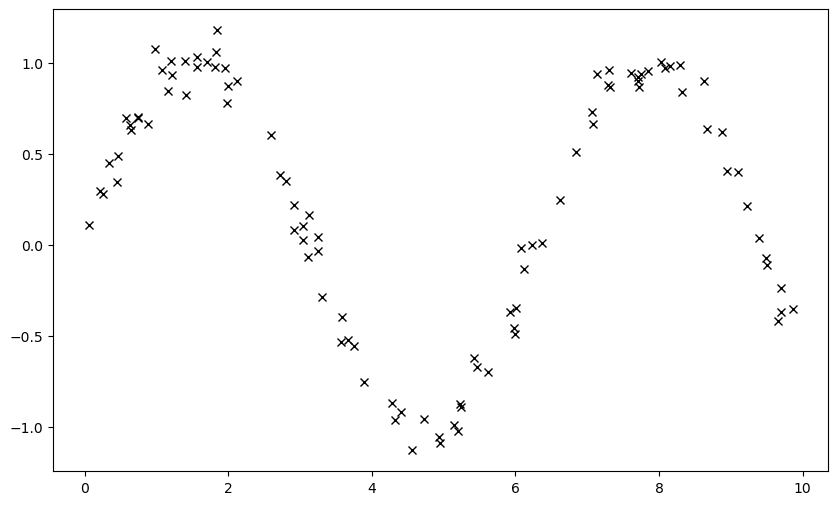

In [428]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from sklearn.model_selection import GridSearchCV, KFold

# Example: Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10   # 100 samples, 1 feature
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # target with noise

# Define the kernel search space
kernel_list = [
    C(1.0, (1e-3, 1e3)) * RBF(length_scale, (1e-2, 1e2)) + WhiteKernel(noise_level)
    for length_scale in [0.1, 1.0, 10.0]
    for noise_level in [1e-5, 1e-3, 1e-1]
]

# Define parameter grid
param_grid = {
    'kernel': kernel_list,
    'alpha': [1e-10, 1e-5, 1e-2]  # regularization parameter
}

# K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Gaussian Process Regressor
gpr = GaussianProcessRegressor()

# Grid Search with CV
grid_search = GridSearchCV(estimator=gpr, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error', verbose=1)

# Perform the grid search
grid_search.fit(X, y)

# Results
print("Best parameters found:")
print(grid_search.best_params_)
print("\nBest score (negative MSE):")
print(grid_search.best_score_)

# Fit final model with best parameters
best_gpr = grid_search.best_estimator_
best_gpr.fit(X_train, y_train)



# Plot (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'kx', label='Train data')
plt.plot(X_test, y_pred , 'b-', label='Prediction')
plt.fill_between(X_test.ravel(), y_pred - y_std, y_pred + y_std, alpha=0.2, color='blue', label='Uncertainty')
plt.title("Gaussian Process Regression with Hyperparameter Tuning")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [424]:
# Get the best parameters from grid search
best_params = best_gpr.best_params_

# Create a new GPR model using those parameters
best_gpr = GaussianProcessRegressor(
    kernel=best_params['kernel'],
    alpha=best_params['alpha'],
    optimizer=best_params['optimizer'],
    normalize_y=True
)

# Fit the model on the full training data
best_gpr.fit(X_train, y_train)

# Predict on new or test data
y_pred = best_gpr.predict(X_test)

AttributeError: 'GaussianProcessRegressor' object has no attribute 'best_param_'